# Initialisation

In [1]:
from SL_model import SL_model
from spharm import legendre, GaussQuad
from time import time
import numpy as np
if __name__ == '__main__':
    model=SL_model(maxdeg=512,nb_workers=12,topo_it_max=10,k_max=10) # Generate the model base
    model.set_from_file('C:/Users/ahenry01/Desktop/Python_code/SL_C0de_output/Article Irrawaddy/base.VM5a.l60.um21.lm22.699result_27.09.2022_17.37.42')
    model.data_way='C:/Users/ahenry01/Desktop/Python_code/SL_C0de_data/'
    model.love_way=model.data_way+'base/VM5a.l60.um21.lm22.699'
    model.ice_way=model.data_way+'ice6G_data.mat'
    model.sed_way=model.data_way+'Irrawady_sedimentationgrid.mat'
    model.topo_way=model.data_way+'topo_SL.mat'
    model.P_lm=legendre(model.maxdeg,model.pool) #Calculate the Legendre associated functions for the Gaussian grid
    model.x, model.w= GaussQuad(model.maxdeg) # calculate the Gaussian grid parameters

    model.create_GRID() #create the grid framework

    model.create_parameters() #Create all grid parameters


    model.ice.quick_load(model.grid,model.pool,model.ice_way) #set the ice model
    model.sed.load(model,model.sed_way) # set the sedimentation model
    model.topo.load(model,model.topo_way) # set the topography model, this function need the sediment and ice model ! 
    #Disk_load=model.grid.disk(model,0,180,1,100)
    # we need to calculate the ocean function after setting the topography due to it's dependencies
    model.create_ocean(model.topo.topo_pres) # create the ocean function (see theoria (TABOO), spada et al., 2003) from the actual topography.
    model.sed.rho=model.data['rho_sed']
    model.oc.rho=model.data['rho_sea']
    model.ice.rho=model.data['rho_ice']
    model.grid.time_step=model.time_step
    model.ice.ice_corrected=model.data['ice_corrected']
    model.SL.delS.saved=model.data['delS']
    model.SL.sdelS.saved=model.data['sdelS']
    model.topo.topo=model.data['topo']

import joblib
way='C:/Users/ahenry01/Desktop/Python_code/SL_C0de_output/Article Irrawaddy/base.VM5a.l60.um21.lm22.699_postt'
with open(way+'.pkl', 'rb') as handle:
            data = joblib.load(handle)
model.delR_e_o=data['delR_e_o']
model.delR_e_s=data['delR_e_s']
model.delR_e_i=data['delR_e_i']
model.delR_v_o=data['delR_v_o']
model.delR_v_s=data['delR_v_s']
model.delR_v_i=data['delR_v_i']
model.delR_e_s_o=model.delR_e_s-model.delR_e_s*model.oc.rho/model.sed.rho
model.delR_v_s_o=model.delR_v_s-model.delR_v_s*model.oc.rho/model.sed.rho
model.delR_e_o_s=model.delR_e_o+model.delR_e_s*model.oc.rho/model.sed.rho
model.delR_v_o_s=model.delR_v_o+model.delR_v_s*model.oc.rho/model.sed.rho
model.delG_e_o=data['delG_e_o']
model.delG_e_s=data['delG_e_s']
model.delG_e_i=data['delG_e_i']
model.delG_v_o=data['delG_v_o']
model.delG_v_s=data['delG_v_s']
model.delG_v_i=data['delG_v_i']
model.delG_e_s_o=model.delG_e_s-model.delG_e_s*model.oc.rho/model.sed.rho
model.delG_v_s_o=model.delG_v_s-model.delG_v_s*model.oc.rho/model.sed.rho
model.delG_e_o_s=model.delG_e_o+model.delG_e_s*model.oc.rho/model.sed.rho
model.delG_v_o_s=model.delG_v_o+model.delG_v_s*model.oc.rho/model.sed.rho
model.delSL=data['delSL']
ESL=data['ESL']

In [2]:
del(data)

In [3]:
np.savetxt("C:/Users/ahenry01/Desktop/Python_code/SL_C0de_data/VM5a_122/time.dat",np.linspace(0,122,122*4+1),delimiter=" ")


# Love numbers

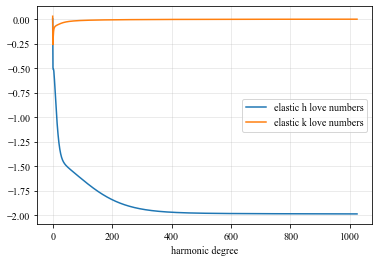

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family':'Times New Roman'})
plt.rcParams.update({'savefig.bbox':'tight'})
fig_love,ax_love=plt.subplots()
ax_love.plot(model.love.h_e,label='elastic h love numbers')
ax_love.plot(model.love.k_e,label='elastic k love numbers')
plt.grid(alpha=0.3)
plt.xlabel('harmonic degree')
plt.legend()

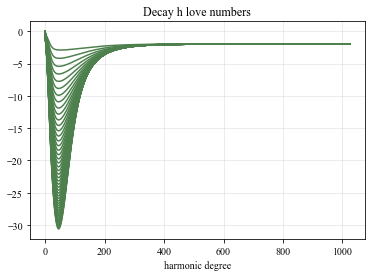

In [ ]:
import matplotlib.pyplot as plt
fig_love_decay,ax_love_decay=plt.subplots()
for i in range (model.time_step_number):
    ax_love_decay.plot(model.love.h_ve[i,:],color=(0.3,0.5,0.3))
plt.xlabel('harmonic degree')
plt.title('Decay h love numbers')
plt.grid(alpha=0.3)

In [ ]:
fig_love.savefig(way+'elastic_love.svg',format='svg')
fig_love_decay.savefig(way+'decay_love.svg',format='svg')

# Initialize plots parameters

In [5]:
# set figure output
way='C:/Users/ahenry01/Desktop/Python_code/figure_output/base/'

In [6]:
model.init_resolution_plot(1024)


In [7]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family':'Times New Roman'})
plt.rcParams.update({'savefig.bbox':'tight'})
sediment_color=(0.4,0.7,0.5)
sediment_color_dark=(0.2,0.4,0.25)
ice_color=(0.1,0.8,0.8)
ocean_color=(0.2,0.2,0.6)
lat_map=[12,20]
lon_map=[90,100]
time_plot=0.5
time_ind=np.where(model.time_step==time_plot)[0][0]
T_1_lat=[25,10]
T_1_lon=[95,96]
T_2_lat=[13,16.5]
T_2_lon=[92,100]
l=200
sediment_ceil=1
sediment_v_ceil=15
sediment_ceil_derived=-sediment_ceil/(model.time_step[time_ind]-model.time_step[time_ind-1])/1000
lat_pt_1=90+15.25
lon_pt_1=95.75
lat_pt_2=90+16.800692
lon_pt_2=96.178826
i_lat_pt_1=np.abs(model.lats_res-lat_pt_1+90).argmin()
i_lon_pt_1=np.abs(model.elons_res-lon_pt_1).argmin()
i_lat_pt_2=np.abs(model.lats_res-lat_pt_2+90).argmin()
i_lon_pt_2=np.abs(model.elons_res-lon_pt_2).argmin()

## Determine the localization of sediment maximum subsidence

In [8]:
from spharm import sphericalobject
grd=sphericalobject(-(model.delR_e_s[time_ind,:]-model.delR_e_s[time_ind-1,:]+model.delR_v_s[time_ind,:]-model.delR_v_s[time_ind-1,:])/(model.time_step[time_ind]-model.time_step[time_ind-1])/1000,"coeff").coefftogrd_hd(model)
i,j=np.where(grd==np.amin(grd))
min=np.amin(grd)
lat,lon=np.meshgrid(model.lats_res,model.elons_res)
lon_pt_1=lon[j,i]
lat_pt_1=lat[j,i]+90
i_lat_pt_1=np.abs(model.lats_res-lat_pt_1+90).argmin()
i_lon_pt_1=np.abs(model.elons_res-lon_pt_1).argmin()

## Change the position of the transect to cross at the subsidence maximum

In [9]:
T_1_a=(T_1_lat[1]-T_1_lat[0])/(T_1_lon[1]-T_1_lon[0])
T_2_a=(T_2_lat[1]-T_2_lat[0])/(T_2_lon[1]-T_2_lon[0])
T_1_b=T_1_lat[0]-90-T_1_a*T_1_lon[0]
T_2_b=T_2_lat[0]-90-T_2_a*T_2_lon[0]
cross_x = (T_2_b-T_1_b)/(T_1_a-T_2_a)
cross_y=T_1_a*cross_x+T_1_b
del_lon=lon_pt_1-cross_x
del_lat=lat_pt_1-cross_y-180
T_1_lat+=del_lat
T_1_lon+=del_lon
T_2_lat+=del_lat
T_2_lon+=del_lon

## Show area

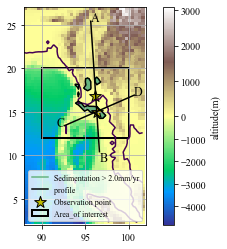

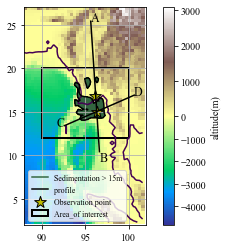

In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import colors
divnorm=colors.TwoSlopeNorm(vcenter=0.)

lat=[2,27]
lon=[88,102]

lat_min=np.absolute(model.grid.lats-lat[0]).argmin()
lat_max=np.absolute(model.grid.lats-lat[1]).argmin()
if lat_min>lat_max :
    temps=lat_max
    lat_max=lat_min
    lat_min=temps
lon_min=np.absolute(model.grid.elons-lon[0]).argmin()
lon_max=np.absolute(model.grid.elons-lon[1]).argmin()
sed_cut=model.sed.sed[time_ind-1,:,:]-model.sed.sed[time_ind,:,:]
sed_cut=sed_cut[lat_min:lat_max,lon_min:lon_max]
topo=model.topo.topo_pres[lat_min:lat_max,lon_min:lon_max]
lati=model.grid.lats[lat_min:lat_max]
long=model.grid.elons[lon_min:lon_max]
fig_sed_act,ax=plt.subplots()
sp=ax.pcolor(long,lati,topo,cmap='terrain',norm=divnorm)
ax.contour(long,lati,topo,levels=[0])
ax.grid()
ax.plot([-1,-0.1],[-95,-94],label='Sedimentation > ' + str(sediment_ceil_derived*1000) + 'mm/yr',color=sediment_color)
ax.contourf(long,lati,sed_cut,levels=[sediment_ceil,90],colors=[sediment_color])
ax.contour(long,lati,sed_cut,levels=[sediment_ceil],colors='k')
ax.plot(T_1_lon,T_1_lat,label='profile',color='k')
ax.plot(T_2_lon,T_2_lat,color='k')
ax.scatter(lon_pt_1,lat_pt_1-90,s=150,marker='*',color='y',edgecolor='k',label='Observation point')
ax.scatter(lon_pt_2,lat_pt_2-90,s=150,marker='*',color='y',edgecolor='k')
plt.colorbar(sp,label='altitude(m)')
ax.set_aspect('equal',adjustable='box')
ax.axis([lon[0],lon[1],lat[0],lat[1]])
rect=patches.Rectangle((lon_map[0],lat_map[0]), 10,8, linewidth=2,edgecolor='k', facecolor='None',label='Area_of interrest',figure=fig_sed_act)
ax.add_patch(rect)
ax.legend(loc='lower left',prop={'size': 8})
plt.text(T_1_lon[0],T_1_lat[0],'A',fontsize='large')
plt.text(T_1_lon[1],T_1_lat[1],'B',fontsize='large',verticalalignment='top')
plt.text(T_2_lon[0],T_2_lat[0],'C',fontsize='large',horizontalalignment='right')
plt.text(T_2_lon[1],T_2_lat[1],'D',fontsize='large')
plt.show()

import matplotlib.pyplot as plt
lat_min=np.absolute(model.grid.lats-lat[0]).argmin()
lat_max=np.absolute(model.grid.lats-lat[1]).argmin()
if lat_min>lat_max :
    temps=lat_max
    lat_max=lat_min
    lat_min=temps
lon_min=np.absolute(model.grid.elons-lon[0]).argmin()
lon_max=np.absolute(model.grid.elons-lon[1]).argmin()
sed_cut=model.sed.sed[model.time_step_number-time_ind,lat_min:lat_max,lon_min:lon_max]
topo=model.topo.topo_pres[lat_min:lat_max,lon_min:lon_max]
lati=model.grid.lats[lat_min:lat_max]
long=model.grid.elons[lon_min:lon_max]
fig_sed_total,ax=plt.subplots()
sp=ax.pcolor(long,lati,topo,cmap='terrain',norm=divnorm)
ax.contour(long,lati,topo,levels=[0])
ax.grid()
ax.plot([-1,-0.1],[-95,-94],label='Sedimentation > ' + str(sediment_v_ceil) + 'm',color=sediment_color_dark)
ax.contourf(long,lati,sed_cut,levels=[sediment_v_ceil,90],colors=[sediment_color_dark])
ax.contour(long,lati,sed_cut,levels=[sediment_v_ceil],colors='k')
ax.plot(T_1_lon,T_1_lat,label='profile',color='k')
ax.plot(T_2_lon,T_2_lat,color='k')
ax.scatter(lon_pt_1,lat_pt_1-90,s=150,marker='*',color='y',edgecolor='k',label='Observation point')
ax.scatter(lon_pt_2,lat_pt_2-90,s=150,marker='*',color='y',edgecolor='k')
plt.colorbar(sp,label='altitude(m)')
ax.set_aspect('equal',adjustable='box')
ax.axis([lon[0],lon[1],lat[0],lat[1]])
plt.text(T_1_lon[0],T_1_lat[0],'A',fontsize='large')
plt.text(T_1_lon[1],T_1_lat[1],'B',fontsize='large',verticalalignment='top')
plt.text(T_2_lon[0],T_2_lat[0],'C',fontsize='large',horizontalalignment='right')
plt.text(T_2_lon[1],T_2_lat[1],'D',fontsize='large')
rect=patches.Rectangle((lon_map[0],lat_map[0]), 10,8, linewidth=2,edgecolor='k', facecolor='None',label='Area_of interrest',figure=fig_sed_total)
ax.add_patch(rect)

ax.legend(loc='lower left',prop={'size': 8})
plt.show()

In [13]:
fig_sed_total.savefig(way+'map_trans_sed_total_'+ str(time_plot) +'.svg',format='svg')
fig_sed_act.savefig(way+'map_trans_sed_act_'+ str(time_plot) +'.svg',format='svg')

## Initialize the topography and sediment for the area of plot

In [14]:
lat_map_min=np.absolute(model.grid.lats-lat_map[0]).argmin()
lat_map_max=np.absolute(model.grid.lats-lat_map[1]).argmin()
if lat_map_min>lat_map_max :
    temps=lat_map_max
    lat_map_max=lat_map_min
    lat_map_min=temps
lon_map_min=np.absolute(model.grid.elons-lon_map[0]).argmin()
lon_map_max=np.absolute(model.grid.elons-lon_map[1]).argmin()
lati=model.grid.lats[lat_map_min:lat_map_max]
long=model.grid.elons[lon_map_min:lon_map_max]
sed_cut=-model.sed.sed[time_ind,lat_map_min:lat_map_max,lon_map_min:lon_map_max]+model.sed.sed[time_ind-1,lat_map_min:lat_map_max,lon_map_min:lon_map_max]
sed_v_cut=model.sed.sed[model.time_step_number-time_ind,lat_map_min:lat_map_max,lon_map_min:lon_map_max]


# Plot earth deformation

## map plot

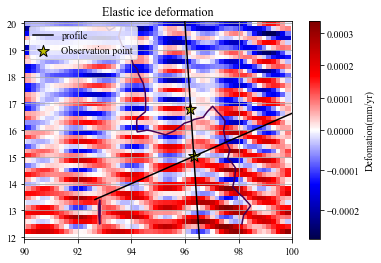

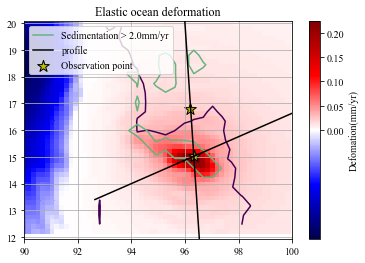

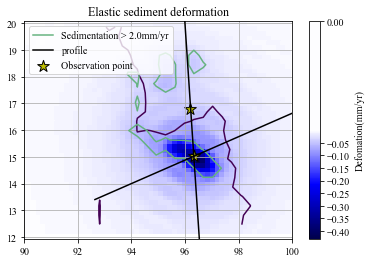

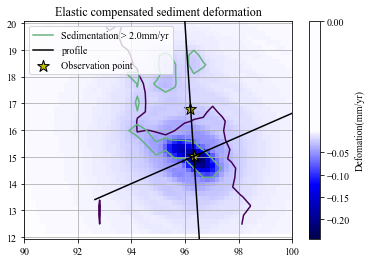

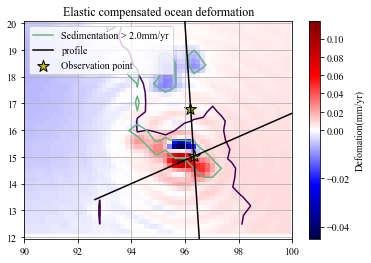

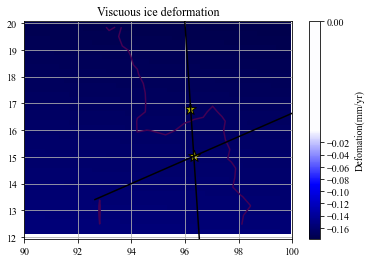

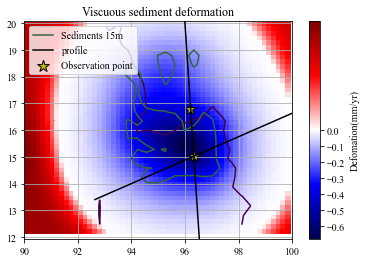

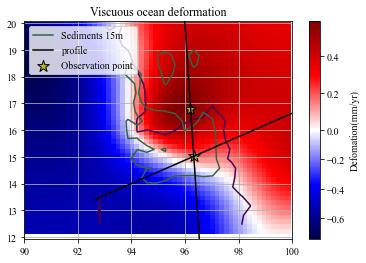

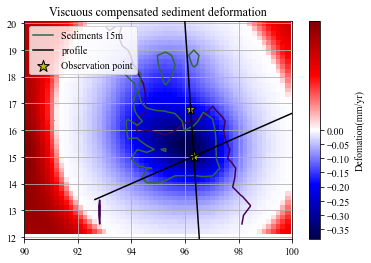

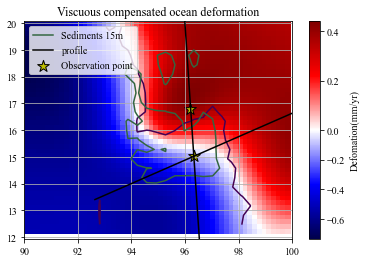

In [22]:
# elastic
#ice
ax_e_i,D_e_i,D_e_i_local,fig_e_i=model.plot_map_derivation(-(model.delR_e_i)*1000,time_plot,lat=lat_map,lon=lon_map,title='Elastic ice deformation',colorbar_title='Defomation(mm/yr)')
ax_e_i.plot(T_1_lon,T_1_lat,label='profile',color='k')
ax_e_i.plot(T_2_lon,T_2_lat,color='k')
ax_e_i.scatter(lon_pt_1,lat_pt_1-90,s=150,marker='*',color='y',edgecolor='k',label='Observation point')
ax_e_i.scatter(lon_pt_2,lat_pt_2-90,s=150,marker='*',color='y',edgecolor='k')
ax_e_i.axis([lon_map[0],lon_map[1],lat_map[0],lat_map[1]])
plt.legend()
#ocean
ax_e_o,D_e_o,D_e_o_local,fig_e_o=model.plot_map_derivation(-(model.delR_e_o)*1000,time_plot,lat=lat_map,lon=lon_map,title='Elastic ocean deformation',colorbar_title='Defomation(mm/yr)')
ax_e_o.contour(long,lati,sed_cut,levels=[sediment_ceil],colors=[sediment_color])
ax_e_o.plot([-1,-0.1],[-95,-94],label='Sedimentation > '+ str(sediment_ceil_derived*1000) +'mm/yr',color=sediment_color)
ax_e_o.plot(T_1_lon,T_1_lat,label='profile',color='k')
ax_e_o.plot(T_2_lon,T_2_lat,color='k')
ax_e_o.scatter(lon_pt_1,lat_pt_1-90,s=150,marker='*',color='y',edgecolor='k',label='Observation point')
ax_e_o.scatter(lon_pt_2,lat_pt_2-90,s=150,marker='*',color='y',edgecolor='k')
ax_e_o.axis([lon_map[0],lon_map[1],lat_map[0],lat_map[1]])
ax_e_o.legend()
#sediment
ax_e_s,D_e_s,D_e_s_local,fig_e_s=model.plot_map_derivation(-(model.delR_e_s)*1000,time_plot,lat=lat_map,lon=lon_map,title='Elastic sediment deformation',colorbar_title='Defomation(mm/yr)')
ax_e_s.contour(long,lati,sed_cut,levels=[sediment_ceil],colors=[sediment_color])
ax_e_s.plot([-1,-0.1],[-95,-94],label='Sedimentation > '+ str(sediment_ceil_derived*1000) +'mm/yr',color=sediment_color)
ax_e_s.plot(T_1_lon,T_1_lat,label='profile',color='k')
ax_e_s.plot(T_2_lon,T_2_lat,color='k')
ax_e_s.scatter(lon_pt_1,lat_pt_1-90,s=150,marker='*',color='y',edgecolor='k',label='Observation point')
ax_e_s.scatter(lon_pt_2,lat_pt_2-90,s=150,marker='*',color='y',edgecolor='k')
ax_e_s.axis([lon_map[0],lon_map[1],lat_map[0],lat_map[1]])
ax_e_s.legend()
#sediment compensated
ax_e_s_o,D_e_s_o,D_e_s_o_local,fig_e_s_o=model.plot_map_derivation(-(model.delR_e_s_o)*1000,time_plot,lat=lat_map,lon=lon_map,title='Elastic compensated sediment deformation',colorbar_title='Defomation(mm/yr)')
ax_e_s_o.contour(long,lati,sed_cut,levels=[sediment_ceil],colors=[sediment_color])
ax_e_s_o.plot([-1,-0.1],[-95,-94],label='Sedimentation > '+ str(sediment_ceil_derived*1000) +'mm/yr',color=sediment_color)
ax_e_s_o.plot(T_1_lon,T_1_lat,label='profile',color='k')
ax_e_s_o.plot(T_2_lon,T_2_lat,color='k')
ax_e_s_o.scatter(lon_pt_1,lat_pt_1-90,s=150,marker='*',color='y',edgecolor='k',label='Observation point')
ax_e_s_o.scatter(lon_pt_2,lat_pt_2-90,s=150,marker='*',color='y',edgecolor='k')
ax_e_s_o.axis([lon_map[0],lon_map[1],lat_map[0],lat_map[1]])
ax_e_s_o.legend()
#ocean_compensate
ax_e_o_s,D_e_o_s,D_e_o_s_local,fig_e_o_s=model.plot_map_derivation(-(model.delR_e_o_s)*1000,time_plot,lat=lat_map,lon=lon_map,title='Elastic compensated ocean deformation',colorbar_title='Defomation(mm/yr)')
ax_e_o_s.contour(long,lati,sed_cut,levels=[sediment_ceil],colors=[sediment_color])
ax_e_o_s.plot([-1,-0.1],[-95,-94],label='Sedimentation > '+ str(sediment_ceil_derived*1000) +'mm/yr',color=sediment_color)
ax_e_o_s.plot(T_1_lon,T_1_lat,label='profile',color='k')
ax_e_o_s.plot(T_2_lon,T_2_lat,color='k')
ax_e_o_s.scatter(lon_pt_1,lat_pt_1-90,s=150,marker='*',color='y',edgecolor='k',label='Observation point')
ax_e_o_s.scatter(lon_pt_2,lat_pt_2-90,s=150,marker='*',color='y',edgecolor='k')
ax_e_o_s.axis([lon_map[0],lon_map[1],lat_map[0],lat_map[1]])
ax_e_o_s.legend()
#viscuous
#ice
ax_v_i,D_v_i,D_v_i_local,fig_v_i=model.plot_map_derivation(-(model.delR_v_i)*1000,time_plot,lat=lat_map,lon=lon_map,title='Viscuous ice deformation',colorbar_title='Defomation(mm/yr)')
ax_v_i.plot(T_1_lon,T_1_lat,label='profile',color='k')
ax_v_i.plot(T_2_lon,T_2_lat,color='k')
ax_v_i.scatter(lon_pt_1,lat_pt_1-90,s=150,marker='*',color='y',edgecolor='k',label='Observation point')
ax_v_i.scatter(lon_pt_2,lat_pt_2-90,s=150,marker='*',color='y',edgecolor='k')
ax_v_i.axis([lon_map[0],lon_map[1],lat_map[0],lat_map[1]])
#sediment
ax_v_s,D_v_s,D_v_s_local,fig_v_s=model.plot_map_derivation(-(model.delR_v_s)*1000,time_plot,lat=lat_map,lon=lon_map,title='Viscuous sediment deformation',colorbar_title='Defomation(mm/yr)')
ax_v_s.contour(long,lati,sed_v_cut,levels=[sediment_v_ceil],colors=[sediment_color_dark])
ax_v_s.plot([-1,-0.1],[-95,-94],label='Sediments '+ str(sediment_v_ceil)+'m',color=sediment_color_dark)
ax_v_s.plot(T_1_lon,T_1_lat,label='profile',color='k')
ax_v_s.plot(T_2_lon,T_2_lat,color='k')
ax_v_s.scatter(lon_pt_1,lat_pt_1-90,s=150,marker='*',color='y',edgecolor='k',label='Observation point')
ax_v_s.scatter(lon_pt_2,lat_pt_2-90,s=150,marker='*',color='y',edgecolor='k')
ax_v_s.axis([lon_map[0],lon_map[1],lat_map[0],lat_map[1]])
ax_v_s.legend()
#ocean
ax_v_o,D_v_o,D_v_o_local,fig_v_o=model.plot_map_derivation(-(model.delR_v_o)*1000,time_plot,lat=lat_map,lon=lon_map,title='Viscuous ocean deformation',colorbar_title='Defomation(mm/yr)')
ax_v_o.contour(long,lati,sed_v_cut,levels=[sediment_v_ceil],colors=[sediment_color_dark])
ax_v_o.plot([-1,-0.1],[-95,-94],label='Sediments '+ str(sediment_v_ceil)+'m',color=sediment_color_dark)
ax_v_o.plot(T_1_lon,T_1_lat,label='profile',color='k')
ax_v_o.plot(T_2_lon,T_2_lat,color='k')
ax_v_o.scatter(lon_pt_1,lat_pt_1-90,s=150,marker='*',color='y',edgecolor='k',label='Observation point')
ax_v_o.scatter(lon_pt_2,lat_pt_2-90,s=150,marker='*',color='y',edgecolor='k')
ax_v_o.axis([lon_map[0],lon_map[1],lat_map[0],lat_map[1]])
ax_v_o.legend()
#sediment compensate
ax_v_s_o,D_v_s_o,D_v_s_o_local,fig_v_s_o=model.plot_map_derivation(-(model.delR_v_s_o)*1000,time_plot,lat=lat_map,lon=lon_map,title='Viscuous compensated sediment deformation',colorbar_title='Defomation(mm/yr)')
ax_v_s_o.contour(long,lati,sed_v_cut,levels=[sediment_v_ceil],colors=[sediment_color_dark])
ax_v_s_o.plot([-1,-0.1],[-95,-94],label='Sediments '+ str(sediment_v_ceil)+'m',color=sediment_color_dark)
ax_v_s_o.plot(T_1_lon,T_1_lat,label='profile',color='k')
ax_v_s_o.plot(T_2_lon,T_2_lat,color='k')
ax_v_s_o.scatter(lon_pt_1,lat_pt_1-90,s=150,marker='*',color='y',edgecolor='k',label='Observation point')
ax_v_s_o.scatter(lon_pt_2,lat_pt_2-90,s=150,marker='*',color='y',edgecolor='k')
ax_v_s_o.axis([lon_map[0],lon_map[1],lat_map[0],lat_map[1]])
ax_v_s_o.legend()
#ocean compensate
ax_v_o_s,D_v_o_s,D_v_o_s_local,fig_v_o_s=model.plot_map_derivation(-(model.delR_v_o_s)*1000,time_plot,lat=lat_map,lon=lon_map,title='Viscuous compensated ocean deformation',colorbar_title='Defomation(mm/yr)')
ax_v_o_s.contour(long,lati,sed_v_cut,levels=[sediment_v_ceil],colors=[sediment_color_dark])
ax_v_o_s.plot([-1,-0.1],[-95,-94],label='Sediments '+ str(sediment_v_ceil)+'m',color=sediment_color_dark)
ax_v_o_s.plot(T_1_lon,T_1_lat,label='profile',color='k')
ax_v_o_s.plot(T_2_lon,T_2_lat,color='k')
ax_v_o_s.scatter(lon_pt_1,lat_pt_1-90,s=150,marker='*',color='y',edgecolor='k',label='Observation point')
ax_v_o_s.scatter(lon_pt_2,lat_pt_2-90,s=150,marker='*',color='y',edgecolor='k')
ax_v_o_s.axis([lon_map[0],lon_map[1],lat_map[0],lat_map[1]])
ax_v_o_s.legend()

In [23]:
fig_e_i.savefig(way+'map_e_i_' + str(time_plot) + '.svg',dpi=300,format='svg')
fig_e_o.savefig(way+'map_e_o_' + str(time_plot) + '.svg',dpi=300,format='svg')
fig_e_s.savefig(way+'map_e_s_' + str(time_plot) + '.svg',dpi=300,format='svg')
fig_v_i.savefig(way+'map_v_i_' + str(time_plot) + '.svg',dpi=300,format='svg')
fig_v_o.savefig(way+'map_v_o_' + str(time_plot) + '.svg',dpi=300,format='svg')
fig_v_s.savefig(way+'map_v_s_' + str(time_plot) + '.svg',dpi=300,format='svg')

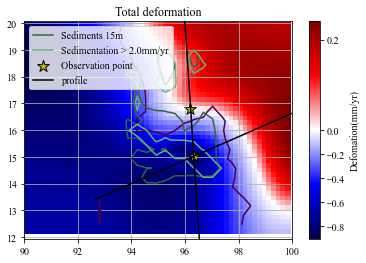

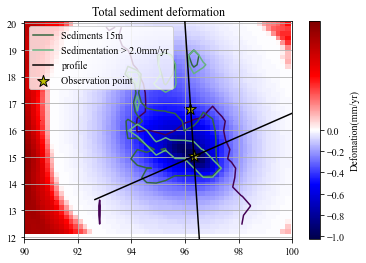

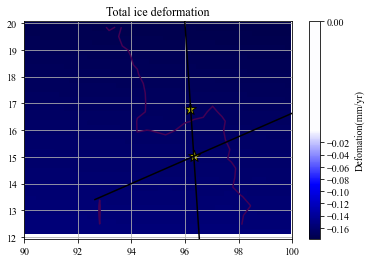

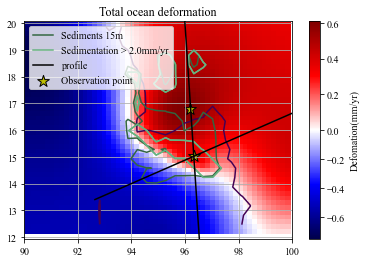

In [24]:
ax_tot,D_tot,D_tot_local,fig_tot=model.plot_map_derivation(-(model.delR_v_o+model.delR_v_i+model.delR_v_s+model.delR_e_o+model.delR_e_i+model.delR_e_s)*1000,time_plot,lat=lat_map,lon=lon_map,title='Total deformation',colorbar_title='Defomation(mm/yr)')
ax_tot.contour(long,lati,sed_v_cut,levels=[sediment_v_ceil],colors=[sediment_color_dark])
ax_tot.plot([-1,-0.1],[-95,-94],label='Sediments '+ str(sediment_v_ceil)+'m',color=sediment_color_dark)
ax_tot.contour(long,lati,sed_cut,levels=[sediment_ceil],colors=[sediment_color])
ax_tot.plot([-1,-0.1],[-95,-94],label='Sedimentation > '+ str(sediment_ceil_derived*1000) +'mm/yr',color=sediment_color)
ax_tot.scatter(lon_pt_1,lat_pt_1-90,s=150,marker='*',color='y',edgecolor='k',label='Observation point')
ax_tot.scatter(lon_pt_2,lat_pt_2-90,s=150,marker='*',color='y',edgecolor='k')
ax_tot.plot(T_1_lon,T_1_lat,label='profile',color='k')
ax_tot.plot(T_2_lon,T_2_lat,color='k')
ax_tot.axis([lon_map[0],lon_map[1],lat_map[0],lat_map[1]])
ax_tot.legend()

ax_tot_s,D_tot_s,D_tot_s_local,fig_tot_s=model.plot_map_derivation(-(model.delR_v_s+model.delR_e_s)*1000,time_plot,lat=lat_map,lon=lon_map,title='Total sediment deformation',colorbar_title='Defomation(mm/yr)')
ax_tot_s.contour(long,lati,sed_v_cut,levels=[sediment_v_ceil],colors=[sediment_color_dark])
ax_tot_s.plot([-1,-0.1],[-95,-94],label='Sediments '+ str(sediment_v_ceil)+'m',color=sediment_color_dark)
ax_tot_s.contour(long,lati,sed_cut,levels=[sediment_ceil],colors=[sediment_color])
ax_tot_s.plot([-1,-0.1],[-95,-94],label='Sedimentation > '+ str(sediment_ceil_derived*1000) +'mm/yr',color=sediment_color)
ax_tot_s.plot(T_1_lon,T_1_lat,label='profile',color='k')
ax_tot_s.plot(T_2_lon,T_2_lat,color='k')
ax_tot_s.scatter(lon_pt_1,lat_pt_1-90,s=150,marker='*',color='y',edgecolor='k',label='Observation point')
ax_tot_s.scatter(lon_pt_2,lat_pt_2-90,s=150,marker='*',color='y',edgecolor='k')
ax_tot_s.axis([lon_map[0],lon_map[1],lat_map[0],lat_map[1]])
ax_tot_s.legend()

ax_tot_i,D_tot_i,D_tot_i_local,fig_tot_i=model.plot_map_derivation(-(model.delR_v_i+model.delR_e_i)*1000,time_plot,lat=lat_map,lon=lon_map,title='Total ice deformation',colorbar_title='Defomation(mm/yr)')
ax_tot_i.plot(T_1_lon,T_1_lat,label='profile',color='k')
ax_tot_i.plot(T_2_lon,T_2_lat,color='k')
ax_tot_i.scatter(lon_pt_1,lat_pt_1-90,s=150,marker='*',color='y',edgecolor='k',label='Observation point')
ax_tot_i.scatter(lon_pt_2,lat_pt_2-90,s=150,marker='*',color='y',edgecolor='k')
ax_tot_i.axis([lon_map[0],lon_map[1],lat_map[0],lat_map[1]])

ax_tot_o,D_tot_o,D_tot_o_local,fig_tot_o=model.plot_map_derivation(-(model.delR_v_o+model.delR_e_o)*1000,time_plot,lat=lat_map,lon=lon_map,title='Total ocean deformation',colorbar_title='Defomation(mm/yr)')
ax_tot_o.contour(long,lati,sed_cut,levels=[sediment_ceil],colors=[sediment_color])
ax_tot_o.contour(long,lati,sed_v_cut,levels=[sediment_v_ceil],colors=[sediment_color_dark])
ax_tot_o.plot([-1,-0.1],[-95,-94],label='Sediments '+ str(sediment_v_ceil)+'m',color=sediment_color_dark)
ax_tot_o.contour(long,lati,sed_cut,levels=[sediment_ceil],colors=[sediment_color])
ax_tot_o.plot([-1,-0.1],[-95,-94],label='Sedimentation > '+ str(sediment_ceil_derived*1000) +'mm/yr',color=sediment_color)
ax_tot_o.plot(T_1_lon,T_1_lat,label='profile',color='k')
ax_tot_o.plot(T_2_lon,T_2_lat,color='k')
ax_tot_o.scatter(lon_pt_1,lat_pt_1-90,s=150,marker='*',color='y',edgecolor='k',label='Observation point')
ax_tot_o.scatter(lon_pt_2,lat_pt_2-90,s=150,marker='*',color='y',edgecolor='k')
ax_tot_o.axis([lon_map[0],lon_map[1],lat_map[0],lat_map[1]])
ax_tot_o.legend()

In [25]:
fig_tot_s.savefig(way+'map_tot_s.svg',dpi=300,format='svg')
fig_tot_i.savefig(way+'map_tot_i.svg',dpi=300,format='svg')
fig_tot_o.savefig(way+'map_tot_o.svg',dpi=300,format='svg')
fig_tot.savefig(way+'map_tot.svg',dpi=300,format='svg')

## Tables of statistics

In [106]:
import pandas
m=np.array([[D_v_s.min(),D_v_i.min(),D_v_o.min(),D_e_s.min(),D_e_i.min(),D_e_o.min(),D_tot_s.min(),D_tot_i.min(),D_tot_o.min()],[D_v_s.max(),D_v_i.max(),D_v_o.max(),D_e_s.max(),D_e_i.max(),D_e_o.max(),D_tot_s.max(),D_tot_i.max(),D_tot_o.max()],[D_v_s.mean(),D_v_i.mean(),D_v_o.mean(),D_e_s.mean(),D_e_i.mean(),D_e_o.mean(),D_tot_s.mean(),D_tot_i.mean(),D_tot_o.mean()],[np.median(D_v_s),np.median(D_v_i),np.median(D_v_o),np.median(D_e_s),np.median(D_e_i),np.median(D_e_o),np.median(D_tot_s),np.median(D_tot_i),np.median(D_tot_o)]])
mux=pandas.MultiIndex.from_product([['Viscuous','Elastic','Total'], ['sediment','ice','ocean']])
table_global=pandas.DataFrame(m.round(2),columns=mux,index=['minimum','maximum','mean','median'])
table_global.insert(table_global.shape[1],("Total","Total"),np.array([D_tot.min(),D_tot.max(),D_tot.mean(),np.median(D_tot)]).round(2))
print(table_global)

        Viscuous                Elastic                Total                \
        sediment    ice  ocean sediment   ice ocean sediment    ice  ocean   
minimum    -0.68  -6.79  -3.28    -0.43 -1.83 -0.09    -1.03  -6.79  -3.34   
maximum     0.02  23.47  17.23     0.00  0.51  0.53     0.02  23.47  17.73   
mean       -0.00   0.25  -0.03     0.00 -0.00  0.01     0.00   0.25  -0.03   
median      0.00  -0.15  -0.32     0.00 -0.00 -0.00     0.00  -0.15  -0.31   

                
         Total  
minimum  -9.32  
maximum  30.70  
mean      0.22  
median   -0.51  


In [107]:
import pandas
m=np.array([[D_v_s_local.min(),D_v_i_local.min(),D_v_o_local.min(),D_e_s_local.min(),D_e_i_local.min(),D_e_o_local.min(),D_tot_s_local.min(),D_tot_i_local.min(),D_tot_o_local.min()],[D_v_s_local.max(),D_v_i_local.max(),D_v_o_local.max(),D_e_s_local.max(),D_e_i_local.max(),D_e_o_local.max(),D_tot_s_local.max(),D_tot_i_local.max(),D_tot_o_local.max()],[D_v_s_local.mean(),D_v_i_local.mean(),D_v_o_local.mean(),D_e_s_local.mean(),D_e_i_local.mean(),D_e_o_local.mean(),D_tot_s_local.mean(),D_tot_i_local.mean(),D_tot_o_local.mean()],[np.median(D_v_s_local),np.median(D_v_i_local),np.median(D_v_o_local),np.median(D_e_s_local),np.median(D_e_i_local),np.median(D_e_o_local),np.median(D_tot_s_local),np.median(D_tot_i_local),np.median(D_tot_o_local)],[D_v_s[i_lat_pt_1,i_lon_pt_1],D_v_i[i_lat_pt_1,i_lon_pt_1],D_v_o[i_lat_pt_1,i_lon_pt_1],D_e_s[i_lat_pt_1,i_lon_pt_1],D_e_i[i_lat_pt_1,i_lon_pt_1],D_e_o[i_lat_pt_1,i_lon_pt_1],D_tot_s[i_lat_pt_1,i_lon_pt_1],D_tot_i[i_lat_pt_1,i_lon_pt_1],D_tot_o[i_lat_pt_1,i_lon_pt_1]],[D_v_s[i_lat_pt_2,i_lon_pt_2],D_v_i[i_lat_pt_2,i_lon_pt_2],D_v_o[i_lat_pt_2,i_lon_pt_2],D_e_s[i_lat_pt_2,i_lon_pt_2],D_e_i[i_lat_pt_2,i_lon_pt_2],D_e_o[i_lat_pt_2,i_lon_pt_2],D_tot_s[i_lat_pt_2,i_lon_pt_2],D_tot_i[i_lat_pt_2,i_lon_pt_2],D_tot_o[i_lat_pt_2,i_lon_pt_2]]])
mux=pandas.MultiIndex.from_product([['Viscuous','Elastic','Total'], ['sediment','ice','ocean']])
table_local=pandas.DataFrame(m.round(2),columns=mux,index=['minimum','maximum','mean','median','depot center','Yangon'])
table_local.insert(table_local.shape[1],("Total","Total"),np.array([D_tot_local.min(),D_tot_local.max(),D_tot_local.mean(),np.median(D_tot_local),D_tot[i_lat_pt_1,i_lon_pt_1],D_tot[i_lat_pt_2,i_lon_pt_2]]).round(2))
print(table_local)

             Viscuous              Elastic               Total              \
             sediment   ice ocean sediment  ice ocean sediment   ice ocean   
minimum         -0.68 -0.18 -0.74    -0.43 -0.0 -0.01    -1.03 -0.18 -0.75   
maximum          0.02 -0.16  0.59    -0.00  0.0  0.22     0.01 -0.16  0.61   
mean            -0.11 -0.17 -0.10    -0.03  0.0  0.01    -0.14 -0.17 -0.09   
median          -0.05 -0.17 -0.12    -0.02  0.0  0.01    -0.06 -0.17 -0.10   
depot center    -0.63 -0.16  0.17    -0.40  0.0  0.20    -1.03 -0.16  0.37   
Yangon          -0.39 -0.17  0.58    -0.05  0.0  0.02    -0.43 -0.17  0.60   

                    
             Total  
minimum      -0.91  
maximum       0.24  
mean         -0.39  
median       -0.54  
depot center -0.82  
Yangon        0.00  


In [16]:
table_global.to_csv(way+'Global_statistic_' + str(time_plot) + '.csv')
table_local.to_csv(way+'Local_statistic_' + str(time_plot) + '.csv')

## Transect

## Initialization

In [26]:
import numpy as np
from scipy import interpolate
import math


lat_trans_1=np.linspace(T_1_lat[0],T_1_lat[1],l)
lon_trans_1=np.linspace(T_1_lon[0],T_1_lon[1],l)

lat_trans_2=np.linspace(T_2_lat[0],T_2_lat[1],l)
lon_trans_2=np.linspace(T_2_lon[0],T_2_lon[1],l)

i_pt_1_T1=(lat_trans_1-lat_pt_1).argmin()
i_pt_1_T2=(lat_trans_2-lat_pt_1).argmin()

elons_res,lats_res=np.meshgrid(model.elons_res,model.lats_res)

D_lin_v_s_t_1=interpolate.griddata((elons_res.flatten(),lats_res.flatten()),D_v_s.flatten(),(lon_trans_1,lat_trans_1),method='linear')
D_lin_v_o_t_1=interpolate.griddata((elons_res.flatten(),lats_res.flatten()),D_v_o.flatten(),(lon_trans_1,lat_trans_1),method='linear')
D_lin_v_i_t_1=interpolate.griddata((elons_res.flatten(),lats_res.flatten()),D_v_i.flatten(),(lon_trans_1,lat_trans_1),method='linear')
D_lin_e_s_t_1=interpolate.griddata((elons_res.flatten(),lats_res.flatten()),D_e_s.flatten(),(lon_trans_1,lat_trans_1),method='linear')
D_lin_e_o_t_1=interpolate.griddata((elons_res.flatten(),lats_res.flatten()),D_e_o.flatten(),(lon_trans_1,lat_trans_1),method='linear')
D_lin_e_i_t_1=interpolate.griddata((elons_res.flatten(),lats_res.flatten()),D_e_i.flatten(),(lon_trans_1,lat_trans_1),method='linear')
D_lin_e_s_o_t_1=interpolate.griddata((elons_res.flatten(),lats_res.flatten()),D_e_s_o.flatten(),(lon_trans_1,lat_trans_1),method='linear')
D_lin_v_s_o_t_1=interpolate.griddata((elons_res.flatten(),lats_res.flatten()),D_v_s_o.flatten(),(lon_trans_1,lat_trans_1),method='linear')
D_lin_e_o_s_t_1=interpolate.griddata((elons_res.flatten(),lats_res.flatten()),D_e_o_s.flatten(),(lon_trans_1,lat_trans_1),method='linear')
D_lin_v_o_s_t_1=interpolate.griddata((elons_res.flatten(),lats_res.flatten()),D_v_o_s.flatten(),(lon_trans_1,lat_trans_1),method='linear')
rad_lat_t_1=math.pi*lat_trans_1/180
rad_lon_t_1=math.pi*lon_trans_1/180
L_t_1=6371*np.arccos(np.cos(rad_lat_t_1[0])*np.cos(rad_lat_t_1)+np.sin(rad_lat_t_1[0])*np.sin(rad_lat_t_1)*np.cos(rad_lon_t_1[0]-rad_lon_t_1))
L_t_1[0]=0

D_lin_v_s_t_2=interpolate.griddata((elons_res.flatten(),lats_res.flatten()),D_v_s.flatten(),(lon_trans_2,lat_trans_2),method='linear')
D_lin_v_o_t_2=interpolate.griddata((elons_res.flatten(),lats_res.flatten()),D_v_o.flatten(),(lon_trans_2,lat_trans_2),method='linear')
D_lin_v_i_t_2=interpolate.griddata((elons_res.flatten(),lats_res.flatten()),D_v_i.flatten(),(lon_trans_2,lat_trans_2),method='linear')
D_lin_e_s_t_2=interpolate.griddata((elons_res.flatten(),lats_res.flatten()),D_e_s.flatten(),(lon_trans_2,lat_trans_2),method='linear')
D_lin_e_o_t_2=interpolate.griddata((elons_res.flatten(),lats_res.flatten()),D_e_o.flatten(),(lon_trans_2,lat_trans_2),method='linear')
D_lin_e_i_t_2=interpolate.griddata((elons_res.flatten(),lats_res.flatten()),D_e_i.flatten(),(lon_trans_2,lat_trans_2),method='linear')
D_lin_e_s_o_t_2=interpolate.griddata((elons_res.flatten(),lats_res.flatten()),D_e_s_o.flatten(),(lon_trans_2,lat_trans_2),method='linear')
D_lin_v_s_o_t_2=interpolate.griddata((elons_res.flatten(),lats_res.flatten()),D_v_s_o.flatten(),(lon_trans_2,lat_trans_2),method='linear')
D_lin_e_o_s_t_2=interpolate.griddata((elons_res.flatten(),lats_res.flatten()),D_e_o_s.flatten(),(lon_trans_2,lat_trans_2),method='linear')
D_lin_v_o_s_t_2=interpolate.griddata((elons_res.flatten(),lats_res.flatten()),D_v_o_s.flatten(),(lon_trans_2,lat_trans_2),method='linear')
rad_lat_t_2=math.pi*lat_trans_2/180
rad_lon_t_2=math.pi*lon_trans_2/180
L_t_2=6371*np.arccos(np.cos(rad_lat_t_2[0])*np.cos(rad_lat_t_2)+np.sin(rad_lat_t_2[0])*np.sin(rad_lat_t_2)*np.cos(rad_lon_t_2[0]-rad_lon_t_2))
L_t_2[0]=0


In [27]:
from cmath import nan
lon_m,lat_m=np.meshgrid(model.grid.elons,model.grid.lats)
sed_lin_t_1_=interpolate.griddata((lon_m.flatten(),lat_m.flatten()),model.sed.sed[time_ind-1,:,:].flatten()-model.sed.sed[time_ind,:,:].flatten(),(lon_trans_1,lat_trans_1),method='linear')
sed_lin_v_t_1_=interpolate.griddata((lon_m.flatten(),lat_m.flatten()),model.sed.sed[model.time_step_number-time_ind,:,:].flatten(),(lon_trans_1,lat_trans_1),method='linear')
sed_lin_t_1=sed_lin_t_1_.copy()
sed_lin_t_1[sed_lin_t_1_<=sediment_ceil]=nan
sed_lin_t_1[sed_lin_t_1_>sediment_ceil]=0
sed_lin_v_t_1=sed_lin_v_t_1_.copy()
sed_lin_v_t_1[sed_lin_v_t_1_<=sediment_v_ceil]=nan
sed_lin_v_t_1[sed_lin_v_t_1_>sediment_v_ceil]=0

sed_lin_t_2_=interpolate.griddata((lon_m.flatten(),lat_m.flatten()),model.sed.sed[time_ind-1,:,:].flatten()-model.sed.sed[time_ind,:,:].flatten(),(lon_trans_2,lat_trans_2),method='linear')
sed_lin_v_t_2_=interpolate.griddata((lon_m.flatten(),lat_m.flatten()),model.sed.sed[model.time_step_number-time_ind,:,:].flatten(),(lon_trans_2,lat_trans_2),method='linear')
sed_lin_t_2=sed_lin_t_2_.copy()
sed_lin_t_2[sed_lin_t_2_<=sediment_ceil]=nan
sed_lin_t_2[sed_lin_t_2_>sediment_ceil]=0
sed_lin_v_t_2=sed_lin_v_t_2_.copy()
sed_lin_v_t_2[sed_lin_v_t_2_<=sediment_v_ceil]=nan
sed_lin_v_t_2[sed_lin_v_t_2_>sediment_v_ceil]=0

In [43]:
i_lon_T1=np.abs(np.tile(model.grid.elons,(len(lon_trans_1),1))-np.tile(lon_trans_1,(len(model.grid.elons),1)).transpose()).argmin(axis=1)
i_lat_T1=np.abs(np.tile(model.grid.lats,(len(lat_trans_1),1))-np.tile(lat_trans_1,(len(model.grid.lats),1)).transpose()).argmin(axis=1)
i_shore_T1=np.abs(model.topo.topo_pres[i_lat_T1,i_lon_T1]).argmin()
i_lon_T2=np.abs(np.tile(model.grid.elons,(len(lon_trans_2),1))-np.tile(lon_trans_2,(len(model.grid.elons),1)).transpose()).argmin(axis=1)
i_lat_T2=np.abs(np.tile(model.grid.lats,(len(lat_trans_2),1))-np.tile(lat_trans_2,(len(model.grid.lats),1)).transpose()).argmin(axis=1)
i_shore_T2=np.abs(model.topo.topo_pres[i_lat_T2,i_lon_T2]).argmin()
i_pt_2_T1=np.abs(lat_trans_1-(lat_pt_2-90)).argmin()
i_pt_1_T1=np.abs(lat_trans_1-(lat_pt_1-90)).argmin()
i_pt_1_T2=np.abs(lat_trans_2-(lat_pt_1-90)).argmin()

## plot transect

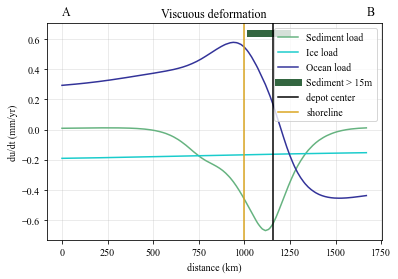

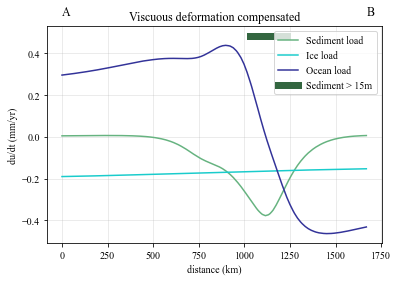

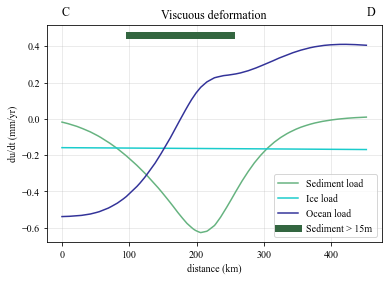

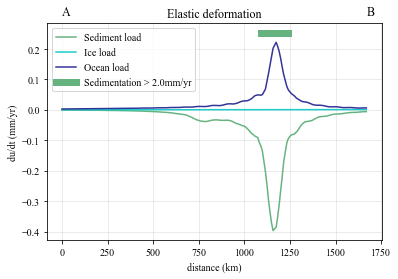

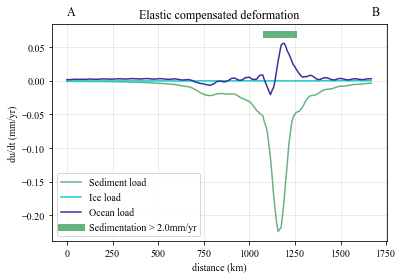

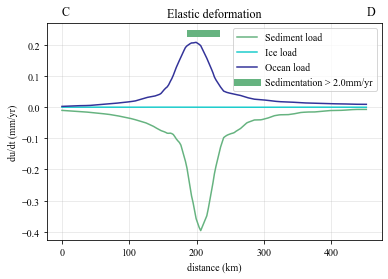

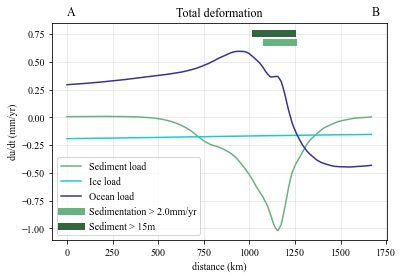

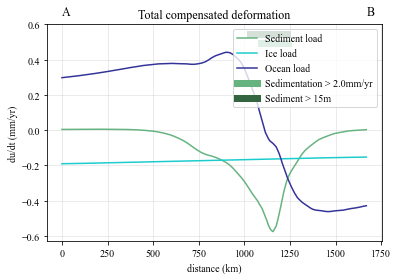

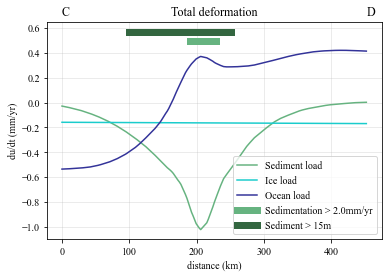

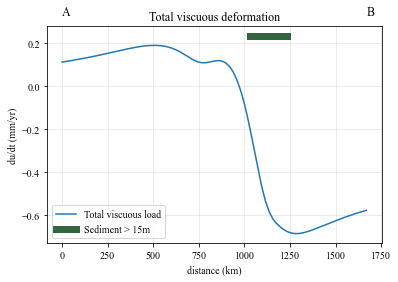

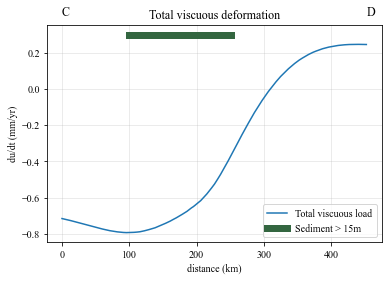

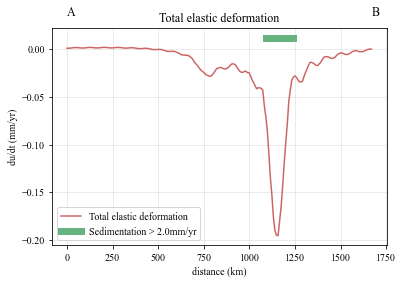

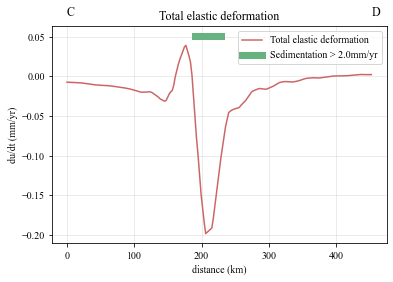

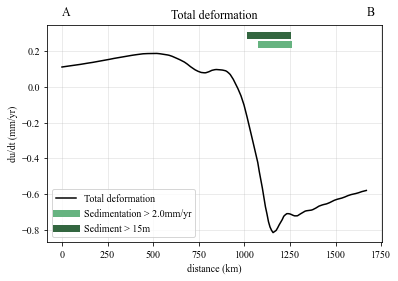

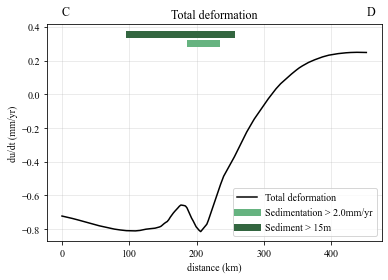

In [33]:
import matplotlib.colors as mcolors

#viscuous t1
fig_v_t_1,ax_v_t_1=plt.subplots()
ax_v_t_1.plot(L_t_1,D_lin_v_s_t_1,label='Sediment load',color=sediment_color)
ax_v_t_1.plot(L_t_1,D_lin_v_i_t_1,label='Ice load',color=ice_color)
ax_v_t_1.plot(L_t_1,D_lin_v_o_t_1,label='Ocean load',color=ocean_color)
ax_v_t_1.plot(L_t_1,sed_lin_v_t_1+max(ax_v_t_1.get_ylim()),linewidth=7,color=sediment_color_dark,label='Sediment > '+ str(sediment_v_ceil) +'m')
y_limit=ax_v_t_1.get_ylim()
ax_v_t_1.plot([L_t_1[i_pt_1_T1],L_t_1[i_pt_1_T1]],ax_v_t_1.get_ylim(),color='k',label='depot center')
ax_v_t_1.plot([L_t_1[i_shore_T1],L_t_1[i_shore_T1]],ax_v_t_1.get_ylim(),color=mcolors.CSS4_COLORS["goldenrod"],label='shoreline')
plt.ylim(y_limit)
plt.grid(alpha=0.3)
plt.title('Viscuous deformation')
plt.xlabel('distance (km)')
plt.ylabel('du/dt (mm/yr)')
ax_v_t_1.legend()
l=ax_v_t_1.get_yticks()
step=(l[-1]-l[0])/(len(l)-1)/4
ax_v_t_1.annotate('A', (0,max(ax_v_t_1.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
ax_v_t_1.annotate('B', (L_t_1[-1],max(ax_v_t_1.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
plt.show()

#viscuous compensated t_1
fig_v_t_1,ax_v_t_1=plt.subplots()
ax_v_t_1.plot(L_t_1,D_lin_v_s_o_t_1,label='Sediment load',color=sediment_color)
ax_v_t_1.plot(L_t_1,D_lin_v_i_t_1,label='Ice load',color=ice_color)
ax_v_t_1.plot(L_t_1,D_lin_v_o_s_t_1,label='Ocean load',color=ocean_color)
ax_v_t_1.plot(L_t_1,sed_lin_v_t_1+max(ax_v_t_1.get_ylim()),linewidth=7,color=sediment_color_dark,label='Sediment > '+ str(sediment_v_ceil) +'m')
plt.grid(alpha=0.3)
plt.title('Viscuous deformation compensated')
plt.xlabel('distance (km)')
plt.ylabel('du/dt (mm/yr)')
ax_v_t_1.legend()
l=ax_v_t_1.get_yticks()
step=(l[-1]-l[0])/(len(l)-1)/4
ax_v_t_1.annotate('A', (0,max(ax_v_t_1.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
ax_v_t_1.annotate('B', (L_t_1[-1],max(ax_v_t_1.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
plt.show()

#viscuous t2
fig_v_t_2,ax_v_t_2=plt.subplots()
ax_v_t_2.plot(L_t_2,D_lin_v_s_t_2,label='Sediment load',color=sediment_color)
ax_v_t_2.plot(L_t_2,D_lin_v_i_t_2,label='Ice load',color=ice_color)
ax_v_t_2.plot(L_t_2,D_lin_v_o_t_2,label='Ocean load',color=ocean_color)
ax_v_t_2.plot(L_t_2,sed_lin_v_t_2+max(ax_v_t_2.get_ylim()),linewidth=7,color=sediment_color_dark,label='Sediment > '+ str(sediment_v_ceil) +'m')
plt.grid(alpha=0.3)
plt.title('Viscuous deformation')
plt.xlabel('distance (km)')
plt.ylabel('du/dt (mm/yr)')
ax_v_t_2.legend()
l=ax_v_t_2.get_yticks()
step=(l[-1]-l[0])/(len(l)-1)/4
ax_v_t_2.annotate('C', (0,max(ax_v_t_2.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
ax_v_t_2.annotate('D', (L_t_2[-1],max(ax_v_t_2.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
plt.show()

#elastic t1
fig_e_t_1,ax_e_t_1=plt.subplots()
ax_e_t_1.plot(L_t_1,D_lin_e_s_t_1,label='Sediment load',color=sediment_color)
ax_e_t_1.plot(L_t_1,D_lin_e_i_t_1,label='Ice load',color=ice_color)
ax_e_t_1.plot(L_t_1,D_lin_e_o_t_1,label='Ocean load',color=ocean_color)
ax_e_t_1.plot(L_t_1,sed_lin_t_1+max(ax_e_t_1.get_ylim()),linewidth=7,color=sediment_color,label='Sedimentation > '+ str(sediment_ceil_derived*1000) +'mm/yr')
plt.grid(alpha=0.3)
plt.title('Elastic deformation')
plt.xlabel('distance (km)')
plt.ylabel('du/dt (mm/yr)')
l=ax_e_t_1.get_yticks()
step=(l[-1]-l[0])/(len(l)-1)/4
ax_e_t_1.annotate('A', (0,max(ax_e_t_1.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
ax_e_t_1.annotate('B', (L_t_1[-1],max(ax_e_t_1.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
plt.legend()
plt.show()

#elastic compensated t1
fig_e_t_1,ax_e_t_1=plt.subplots()
ax_e_t_1.plot(L_t_1,D_lin_e_s_o_t_1,label='Sediment load',color=sediment_color)
ax_e_t_1.plot(L_t_1,D_lin_e_i_t_1,label='Ice load',color=ice_color)
ax_e_t_1.plot(L_t_1,D_lin_e_o_s_t_1,label='Ocean load',color=ocean_color)
ax_e_t_1.plot(L_t_1,sed_lin_t_1+max(ax_e_t_1.get_ylim()),linewidth=7,color=sediment_color,label='Sedimentation > '+ str(sediment_ceil_derived*1000) +'mm/yr')
plt.grid(alpha=0.3)
plt.title('Elastic compensated deformation')
plt.xlabel('distance (km)')
plt.ylabel('du/dt (mm/yr)')
l=ax_e_t_1.get_yticks()
step=(l[-1]-l[0])/(len(l)-1)/4
ax_e_t_1.annotate('A', (0,max(ax_e_t_1.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
ax_e_t_1.annotate('B', (L_t_1[-1],max(ax_e_t_1.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
plt.legend()
plt.show()

#elastic t2
fig_e_t_2,ax_e_t_2=plt.subplots()
ax_e_t_2.plot(L_t_2,D_lin_e_s_t_2,label='Sediment load',color=sediment_color)
ax_e_t_2.plot(L_t_2,D_lin_e_i_t_2,label='Ice load',color=ice_color)
ax_e_t_2.plot(L_t_2,D_lin_e_o_t_2,label='Ocean load',color=ocean_color)
ax_e_t_2.plot(L_t_2,sed_lin_t_2+max(ax_e_t_2.get_ylim()),linewidth=7,color=sediment_color,label='Sedimentation > '+ str(sediment_ceil_derived*1000) +'mm/yr')
plt.grid(alpha=0.3)
plt.title('Elastic deformation')
plt.xlabel('distance (km)')
plt.ylabel('du/dt (mm/yr)')
plt.legend()
l=ax_e_t_2.get_yticks()
step=(l[-1]-l[0])/(len(l)-1)/4
ax_e_t_2.annotate('C', (0,max(ax_e_t_2.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
ax_e_t_2.annotate('D', (L_t_2[-1],max(ax_e_t_2.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
plt.show()

#total load t1
fig_tot_t_1,ax_tot_t_1=plt.subplots()
ax_tot_t_1.plot(L_t_1,D_lin_e_s_t_1+D_lin_v_s_t_1,label='Sediment load',color=sediment_color)
ax_tot_t_1.plot(L_t_1,D_lin_e_i_t_1+D_lin_v_i_t_1,label='Ice load',color=ice_color)
ax_tot_t_1.plot(L_t_1,D_lin_e_o_t_1+D_lin_v_o_t_1,label='Ocean load',color=ocean_color)
ax_tot_t_1.plot(L_t_1,sed_lin_t_1+max(ax_tot_t_1.get_ylim()),linewidth=7,color=sediment_color,label='Sedimentation > '+ str(sediment_ceil_derived*1000) +'mm/yr')
ax_tot_t_1.plot(L_t_1,sed_lin_v_t_1+max(ax_tot_t_1.get_ylim()),linewidth=7,color=sediment_color_dark,label='Sediment > '+ str(sediment_v_ceil) +'m')
plt.grid(alpha=0.3)
plt.title('Total deformation')
plt.xlabel('distance (km)')
plt.ylabel('du/dt (mm/yr)')
plt.legend()
l=ax_tot_t_1.get_yticks()
step=(l[-1]-l[0])/(len(l)-1)/4
ax_tot_t_1.annotate('A', (0,max(ax_tot_t_1.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
ax_tot_t_1.annotate('B', (L_t_1[-1],max(ax_tot_t_1.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
plt.show()

#total compensated load t1
fig_tot_t_1,ax_tot_t_1=plt.subplots()
ax_tot_t_1.plot(L_t_1,D_lin_e_s_o_t_1+D_lin_v_s_o_t_1,label='Sediment load',color=sediment_color)
ax_tot_t_1.plot(L_t_1,D_lin_e_i_t_1+D_lin_v_i_t_1,label='Ice load',color=ice_color)
ax_tot_t_1.plot(L_t_1,D_lin_e_o_s_t_1+D_lin_v_o_s_t_1,label='Ocean load',color=ocean_color)
ax_tot_t_1.plot(L_t_1,sed_lin_t_1+max(ax_tot_t_1.get_ylim()),linewidth=7,color=sediment_color,label='Sedimentation > '+ str(sediment_ceil_derived*1000) +'mm/yr')
ax_tot_t_1.plot(L_t_1,sed_lin_v_t_1+max(ax_tot_t_1.get_ylim()),linewidth=7,color=sediment_color_dark,label='Sediment > '+ str(sediment_v_ceil) +'m')
plt.grid(alpha=0.3)
plt.title('Total compensated deformation')
plt.xlabel('distance (km)')
plt.ylabel('du/dt (mm/yr)')
plt.legend()
l=ax_tot_t_1.get_yticks()
step=(l[-1]-l[0])/(len(l)-1)/4
ax_tot_t_1.annotate('A', (0,max(ax_tot_t_1.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
ax_tot_t_1.annotate('B', (L_t_1[-1],max(ax_tot_t_1.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
plt.show()

#total load t2
fig_tot_t_2,ax_tot_t_2=plt.subplots()
ax_tot_t_2.plot(L_t_2,D_lin_e_s_t_2+D_lin_v_s_t_2,label='Sediment load',color=sediment_color)
ax_tot_t_2.plot(L_t_2,D_lin_e_i_t_2+D_lin_v_i_t_2,label='Ice load',color=ice_color)
ax_tot_t_2.plot(L_t_2,D_lin_e_o_t_2+D_lin_v_o_t_2,label='Ocean load',color=ocean_color)
ax_tot_t_2.plot(L_t_2,sed_lin_t_2+max(ax_tot_t_2.get_ylim()),linewidth=7,color=sediment_color,label='Sedimentation > '+ str(sediment_ceil_derived*1000) +'mm/yr')
ax_tot_t_2.plot(L_t_2,sed_lin_v_t_2+max(ax_tot_t_2.get_ylim()),linewidth=7,color=sediment_color_dark,label='Sediment > '+ str(sediment_v_ceil) +'m')
plt.grid(alpha=0.3)
plt.title('Total deformation')
plt.xlabel('distance (km)')
plt.ylabel('du/dt (mm/yr)')
plt.legend()
l=ax_tot_t_2.get_yticks()
step=(l[-1]-l[0])/(len(l)-1)/4
ax_tot_t_2.annotate('C', (0,max(ax_tot_t_2.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
ax_tot_t_2.annotate('D', (L_t_2[-1],max(ax_tot_t_2.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
plt.show()

#total viscuous t1
fig_tot_v_t_1,ax_tot_v_t_1=plt.subplots()
ax_tot_v_t_1.plot(L_t_1,D_lin_v_s_t_1+D_lin_v_i_t_1+D_lin_v_o_t_1,label='Total viscuous load')
ax_tot_v_t_1.plot(L_t_1,sed_lin_v_t_1+max(ax_tot_v_t_1.get_ylim()),linewidth=7,color=sediment_color_dark,label='Sediment > '+ str(sediment_v_ceil) +'m')
plt.grid(alpha=0.3)
plt.title('Total viscuous deformation')
plt.xlabel('distance (km)')
plt.ylabel('du/dt (mm/yr)')
plt.legend()
l=ax_tot_v_t_1.get_yticks()
step=(l[-1]-l[0])/(len(l)-1)/4
ax_tot_v_t_1.annotate('A', (0,max(ax_tot_v_t_1.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
ax_tot_v_t_1.annotate('B', (L_t_1[-1],max(ax_tot_v_t_1.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
plt.show()

#total viscuous t2
fig_tot_v_t_2,ax_tot_v_t_2=plt.subplots()
ax_tot_v_t_2.plot(L_t_2,D_lin_v_s_t_2+D_lin_v_i_t_2+D_lin_v_o_t_2,label='Total viscuous load')
ax_tot_v_t_2.plot(L_t_2,sed_lin_v_t_2+max(ax_tot_v_t_2.get_ylim()),linewidth=7,color=sediment_color_dark,label='Sediment > '+ str(sediment_v_ceil) +'m')
plt.grid(alpha=0.3)
plt.title('Total viscuous deformation')
plt.xlabel('distance (km)')
plt.ylabel('du/dt (mm/yr)')
plt.legend()
l=ax_tot_v_t_2.get_yticks()
step=(l[-1]-l[0])/(len(l)-1)/4
ax_tot_v_t_2.annotate('C', (0,max(ax_tot_v_t_2.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
ax_tot_v_t_2.annotate('D', (L_t_2[-1],max(ax_tot_v_t_2.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
plt.show()

#total elastic t1
fig_tot_e_t_1,ax_tot_e_t_1=plt.subplots()
ax_tot_e_t_1.plot(L_t_1,D_lin_e_s_t_1+D_lin_e_i_t_1+D_lin_e_o_t_1,label='Total elastic deformation',color=(0.8,0.4,0.4))
ax_tot_e_t_1.plot(L_t_1,sed_lin_t_1+max(ax_tot_e_t_1.get_ylim()),linewidth=7,color=sediment_color,label='Sedimentation > '+ str(sediment_ceil_derived*1000) +'mm/yr')
plt.grid(alpha=0.3)
plt.title('Total elastic deformation')
plt.xlabel('distance (km)')
plt.ylabel('du/dt (mm/yr)')
plt.legend()
l=ax_tot_e_t_1.get_yticks()
step=(l[-1]-l[0])/(len(l)-1)/4
ax_tot_e_t_1.annotate('A', (0,max(ax_tot_e_t_1.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
ax_tot_e_t_1.annotate('B', (L_t_1[-1],max(ax_tot_e_t_1.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
plt.show()

#total elastic t2
fig_tot_e_t_2,ax_tot_e_t_2=plt.subplots()
ax_tot_e_t_2.plot(L_t_2,D_lin_e_s_t_2+D_lin_e_i_t_2+D_lin_e_o_t_2,label='Total elastic deformation',color=(0.8,0.4,0.4))
ax_tot_e_t_2.plot(L_t_2,sed_lin_t_2+max(ax_tot_e_t_2.get_ylim()),linewidth=7,color=sediment_color,label='Sedimentation > '+ str(sediment_ceil_derived*1000) +'mm/yr')
plt.grid(alpha=0.3)
plt.title('Total elastic deformation')
plt.xlabel('distance (km)')
plt.ylabel('du/dt (mm/yr)')
plt.legend()
l=ax_tot_e_t_2.get_yticks()
step=(l[-1]-l[0])/(len(l)-1)/4
ax_tot_e_t_2.annotate('C', (0,max(ax_tot_e_t_2.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
ax_tot_e_t_2.annotate('D', (L_t_2[-1],max(ax_tot_e_t_2.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
plt.show()

#total t1
fig_tot_tot_t_1,ax_tot_tot_t_1=plt.subplots()
ax_tot_tot_t_1.plot(L_t_1,D_lin_v_s_t_1+D_lin_v_i_t_1+D_lin_v_o_t_1+D_lin_e_s_t_1+D_lin_e_i_t_1+D_lin_e_o_t_1,label='Total deformation',color='k')
ax_tot_tot_t_1.plot(L_t_1,sed_lin_t_1+max(ax_tot_tot_t_1.get_ylim()),linewidth=7,color=sediment_color,label='Sedimentation > '+ str(sediment_ceil_derived*1000) +'mm/yr')
ax_tot_tot_t_1.plot(L_t_1,sed_lin_v_t_1+max(ax_tot_tot_t_1.get_ylim()),linewidth=7,color=sediment_color_dark,label='Sediment > '+ str(sediment_v_ceil) +'m')
plt.grid(alpha=0.3)
plt.title('Total deformation')
plt.xlabel('distance (km)')
plt.ylabel('du/dt (mm/yr)')
plt.legend()
l=ax_tot_tot_t_1.get_yticks()
step=(l[-1]-l[0])/(len(l)-1)/4
ax_tot_tot_t_1.annotate('A', (0,max(ax_tot_tot_t_1.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
ax_tot_tot_t_1.annotate('B', (L_t_1[-1],max(ax_tot_tot_t_1.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
plt.show()

#total t2
fig_tot_tot_t_2,ax_tot_tot_t_2=plt.subplots()
ax_tot_tot_t_2.plot(L_t_2,D_lin_v_s_t_2+D_lin_v_i_t_2+D_lin_v_o_t_2+D_lin_e_s_t_2+D_lin_e_i_t_2+D_lin_e_o_t_2,label='Total deformation',color='k')
ax_tot_tot_t_2.plot(L_t_2,sed_lin_t_2+max(ax_tot_tot_t_2.get_ylim()),linewidth=7,color=sediment_color,label='Sedimentation > '+ str(sediment_ceil_derived*1000) +'mm/yr')
ax_tot_tot_t_2.plot(L_t_2,sed_lin_v_t_2+max(ax_tot_tot_t_2.get_ylim()),linewidth=7,color=sediment_color_dark,label='Sediment > '+ str(sediment_v_ceil) +'m')
plt.grid(alpha=0.3)
plt.title('Total deformation')
plt.xlabel('distance (km)')
plt.ylabel('du/dt (mm/yr)')
plt.legend()
l=ax_tot_tot_t_2.get_yticks()
step=(l[-1]-l[0])/(len(l)-1)/4
ax_tot_tot_t_2.annotate('C', (0,max(ax_tot_tot_t_2.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
ax_tot_tot_t_2.annotate('D', (L_t_2[-1],max(ax_tot_tot_t_2.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
plt.show()


In [81]:
fig_v_t_1.savefig(way+'T1_v_'+str(time_plot)+'.svg',format='svg')
fig_v_t_2.savefig(way+'T2_v_'+str(time_plot)+'.svg',format='svg')
fig_e_t_1.savefig(way+'T1_e_'+str(time_plot)+'.svg',format='svg')
fig_e_t_2.savefig(way+'T2_e_'+str(time_plot)+'.svg',format='svg')
fig_tot_t_1.savefig(way+'T1_tot_'+str(time_plot)+'.svg',format='svg')
fig_tot_t_2.savefig(way+'T2_tot_'+str(time_plot)+'.svg',format='svg')
fig_tot_v_t_1.savefig(way+'T1_v_tot_'+str(time_plot)+'.svg',format='svg')
fig_tot_v_t_2.savefig(way+'T2_v_tot_'+str(time_plot)+'.svg',format='svg')
fig_tot_e_t_1.savefig(way+'T1_e_tot_'+str(time_plot)+'.svg',format='svg')
fig_tot_e_t_2.savefig(way+'T2_e_tot_'+str(time_plot)+'.svg',format='svg')
fig_tot_tot_t_1.savefig(way+'T1_tot_tot_'+str(time_plot)+'.svg',format='svg')
fig_tot_tot_t_2.savefig(way+'T2_tot_tot_'+str(time_plot)+'.svg',format='svg')

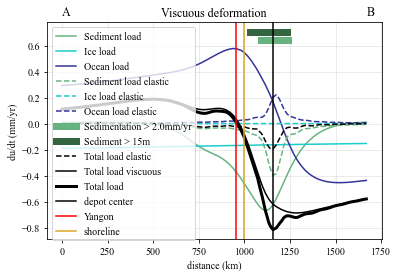

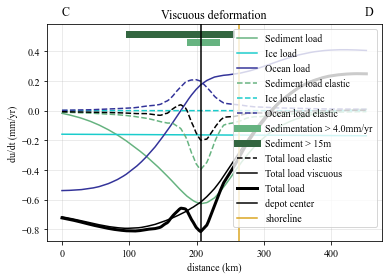

In [48]:
fig_full_t_1,ax_full_t_1=plt.subplots()
ax_full_t_1.plot(L_t_1,D_lin_v_s_t_1,label='Sediment load',color=sediment_color)
ax_full_t_1.plot(L_t_1,D_lin_v_i_t_1,label='Ice load',color=ice_color)
ax_full_t_1.plot(L_t_1,D_lin_v_o_t_1,label='Ocean load',color=ocean_color)
ax_full_t_1.plot(L_t_1,D_lin_e_s_t_1,label='Sediment load elastic',color=sediment_color,linestyle='dashed')
ax_full_t_1.plot(L_t_1,D_lin_e_i_t_1,label='Ice load elastic',color=ice_color,linestyle='dashed')
ax_full_t_1.plot(L_t_1,D_lin_e_o_t_1,label='Ocean load elastic',color=ocean_color,linestyle='dashed')
ax_full_t_1.plot(L_t_1,sed_lin_t_1+max(ax_full_t_1.get_ylim()),linewidth=7,color=sediment_color,label='Sedimentation > '+ str(sediment_ceil_derived*1000) +'mm/yr')
ax_full_t_1.plot(L_t_1,sed_lin_v_t_1+max(ax_full_t_1.get_ylim()),linewidth=7,color=sediment_color_dark,label='Sediment > '+ str(sediment_v_ceil) +'m')
ax_full_t_1.plot(L_t_1,D_lin_e_o_t_1+D_lin_e_s_t_1+D_lin_e_i_t_1,label='Total load elastic',color='k',linestyle='dashed')
ax_full_t_1.plot(L_t_1,D_lin_v_o_t_1+D_lin_v_s_t_1+D_lin_v_i_t_1,label='Total load viscuous',color='k')
ax_full_t_1.plot(L_t_1,D_lin_v_o_t_1+D_lin_v_s_t_1+D_lin_v_i_t_1+D_lin_e_o_t_1+D_lin_e_s_t_1+D_lin_e_i_t_1,label='Total load',color='k',linewidth=3)
y_limit=ax_full_t_1.get_ylim()
ax_full_t_1.plot([L_t_1[i_pt_1_T1],L_t_1[i_pt_1_T1]],ax_full_t_1.get_ylim(),color='k',label='depot center')
ax_full_t_1.plot([L_t_1[i_pt_2_T1],L_t_1[i_pt_2_T1]],ax_full_t_1.get_ylim(),color='r',label='Yangon')
ax_full_t_1.plot([L_t_1[i_shore_T1],L_t_1[i_shore_T1]],ax_full_t_1.get_ylim(),color=mcolors.CSS4_COLORS["goldenrod"],label='shoreline')
plt.ylim(y_limit)
plt.grid(alpha=0.3)
plt.title('Viscuous deformation')
plt.xlabel('distance (km)')
plt.ylabel('du/dt (mm/yr)')
ax_full_t_1.legend()
l=ax_full_t_1.get_yticks()
step=(l[-1]-l[0])/(len(l)-1)/4
ax_full_t_1.annotate('A', (0,max(ax_full_t_1.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
ax_full_t_1.annotate('B', (L_t_1[-1],max(ax_full_t_1.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
plt.show()

fig_full_t_2,ax_full_t_2=plt.subplots()
ax_full_t_2.plot(L_t_2,D_lin_v_s_t_2,label='Sediment load',color=sediment_color)
ax_full_t_2.plot(L_t_2,D_lin_v_i_t_2,label='Ice load',color=ice_color)
ax_full_t_2.plot(L_t_2,D_lin_v_o_t_2,label='Ocean load',color=ocean_color)
ax_full_t_2.plot(L_t_2,D_lin_e_s_t_2,label='Sediment load elastic',color=sediment_color,linestyle='dashed')
ax_full_t_2.plot(L_t_2,D_lin_e_i_t_2,label='Ice load elastic',color=ice_color,linestyle='dashed')
ax_full_t_2.plot(L_t_2,D_lin_e_o_t_2,label='Ocean load elastic',color=ocean_color,linestyle='dashed')
ax_full_t_2.plot(L_t_2,sed_lin_t_2+max(ax_full_t_2.get_ylim()),linewidth=7,color=sediment_color,label='Sedimentation > '+ str(sediment_ceil_derived*2000) +'mm/yr')
ax_full_t_2.plot(L_t_2,sed_lin_v_t_2+max(ax_full_t_2.get_ylim()),linewidth=7,color=sediment_color_dark,label='Sediment > '+ str(sediment_v_ceil) +'m')
ax_full_t_2.plot(L_t_2,D_lin_e_o_t_2+D_lin_e_s_t_2+D_lin_e_i_t_2,label='Total load elastic',color='k',linestyle='dashed')
ax_full_t_2.plot(L_t_2,D_lin_v_o_t_2+D_lin_v_s_t_2+D_lin_v_i_t_2,label='Total load viscuous',color='k')
ax_full_t_2.plot(L_t_2,D_lin_v_o_t_2+D_lin_v_s_t_2+D_lin_v_i_t_2+D_lin_e_o_t_2+D_lin_e_s_t_2+D_lin_e_i_t_2,label='Total load',color='k',linewidth=3)
y_limit=ax_full_t_2.get_ylim()
ax_full_t_2.plot([L_t_2[i_pt_1_T2],L_t_2[i_pt_1_T2]],ax_full_t_2.get_ylim(),color='k',label='depot center')
ax_full_t_2.plot([L_t_2[i_shore_T2],L_t_2[i_shore_T2]],ax_full_t_2.get_ylim(),color=mcolors.CSS4_COLORS["goldenrod"],label='shoreline')
plt.ylim(y_limit)
plt.grid(alpha=0.3)
plt.title('Viscuous deformation')
plt.xlabel('distance (km)')
plt.ylabel('du/dt (mm/yr)')
ax_full_t_2.legend()
l=ax_full_t_2.get_yticks()
step=(l[-1]-l[0])/(len(l)-2)/4
ax_full_t_2.annotate('C', (0,max(ax_full_t_2.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
ax_full_t_2.annotate('D', (L_t_2[-2],max(ax_full_t_2.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
plt.show()

In [49]:
fig_full_t_1.savefig(way+'T1_full_'+str(time_plot)+'.svg',format='svg')
fig_full_t_2.savefig(way+'T2_full_'+str(time_plot)+'.svg',format='svg')

## Time plot


## Initialisation

c:\Users\ahenry01\miniconda3\envs\SL_C0de\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning:

Casting complex values to real discards the imaginary part



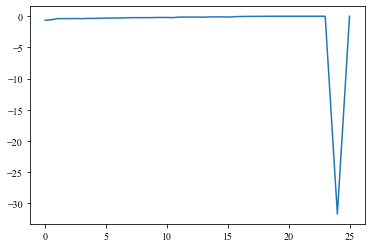

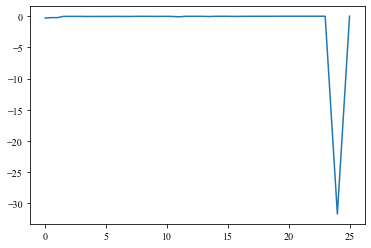

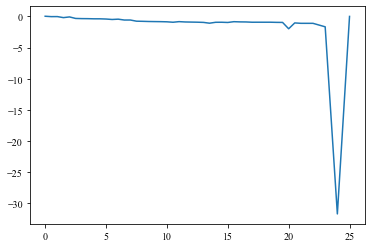

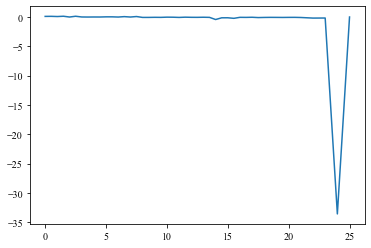

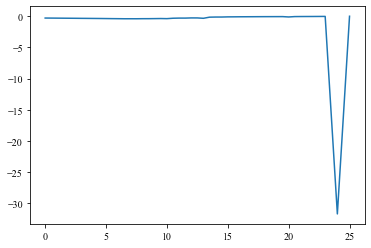

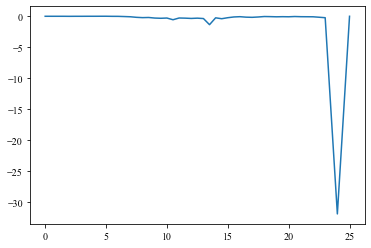

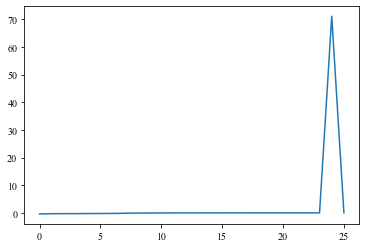

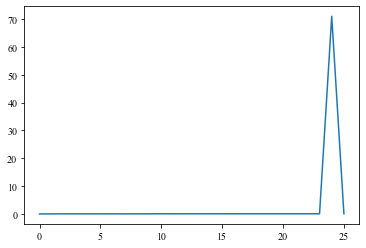

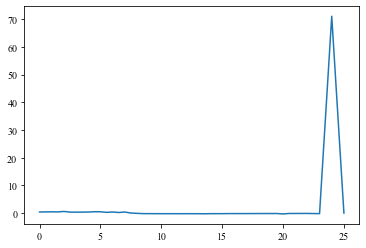

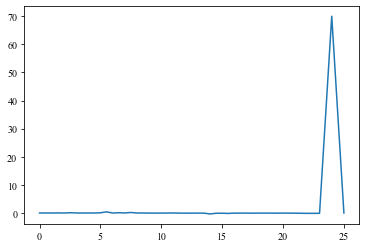

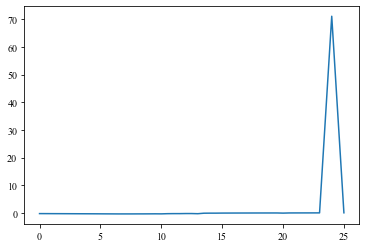

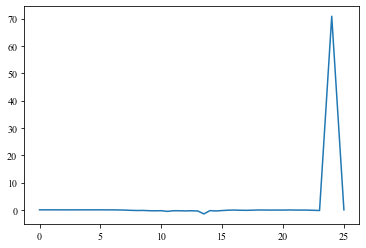

In [91]:
ax,y_v_s_pt_1=model.plot_at_point_derivation(-model.delR_v_s*10**3,lat_pt_1,lon_pt_1)
ax,y_e_s_pt_1=model.plot_at_point_derivation(-model.delR_e_s*10**3,lat_pt_1,lon_pt_1)
ax,y_v_o_pt_1=model.plot_at_point_derivation(-model.delR_v_o*10**3,lat_pt_1,lon_pt_1)
ax,y_e_o_pt_1=model.plot_at_point_derivation(-model.delR_e_o*10**3,lat_pt_1,lon_pt_1)
ax,y_v_i_pt_1=model.plot_at_point_derivation(-model.delR_v_i*10**3,lat_pt_1,lon_pt_1)
ax,y_e_i_pt_1=model.plot_at_point_derivation(-model.delR_e_i*10**3,lat_pt_1,lon_pt_1)

ax,y_v_s_pt_2=model.plot_at_point_derivation(-model.delR_v_s*10**3,lat_pt_2,lon_pt_2)
ax,y_e_s_pt_2=model.plot_at_point_derivation(-model.delR_e_s*10**3,lat_pt_2,lon_pt_2)
ax,y_v_o_pt_2=model.plot_at_point_derivation(-model.delR_v_o*10**3,lat_pt_2,lon_pt_2)
ax,y_e_o_pt_2=model.plot_at_point_derivation(-model.delR_e_o*10**3,lat_pt_2,lon_pt_2)
ax,y_v_i_pt_2=model.plot_at_point_derivation(-model.delR_v_i*10**3,lat_pt_2,lon_pt_2)
ax,y_e_i_pt_2=model.plot_at_point_derivation(-model.delR_e_i*10**3,lat_pt_2,lon_pt_2)

In [92]:
s_tot_=np.concatenate((np.zeros((1,)),model.sed.sed.sum(1).sum(1)))-np.concatenate((model.sed.sed.sum(1).sum(1),np.zeros((1,))))

ice_tot_=np.concatenate((np.zeros((1,)),model.ice.ice.sum(1).sum(1)))-np.concatenate((model.ice.ice.sum(1).sum(1),np.zeros((1,))))

from spharm import sphericalobject
ocean_max=np.array([])
ocean=model.SL.delS.saved[9*47+1:,:]
for C in ocean :
    ocean_max=np.concatenate((ocean_max,np.array([sphericalobject(C,'coeff').coefftogrd(model).grd.sum(0).sum(0)])))

ocean_tot_=-np.concatenate((np.zeros((1,)),ocean_max))+np.concatenate((ocean_max,np.zeros((1,))))

In [97]:
sediment_ceil=35
s_tot=s_tot_.copy()
s_tot[s_tot_>sediment_ceil]=0
s_tot[s_tot_<=sediment_ceil]=np.nan

ice_ceil=0.2*10**7
ice_tot=ice_tot_.copy()
ice_tot[ice_tot_>ice_ceil]=0
ice_tot[ice_tot_<=ice_ceil]=np.nan

ocean_ceil=1.5*10**6
ocean_tot=ocean_tot_.copy()
ocean_tot[ocean_tot_>ocean_ceil]=0
ocean_tot[ocean_tot_<=ocean_ceil]=np.nan

## plot time load

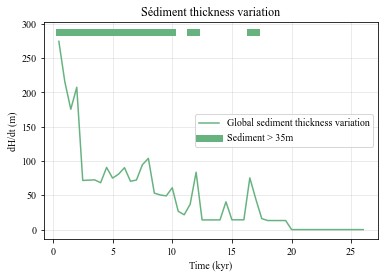

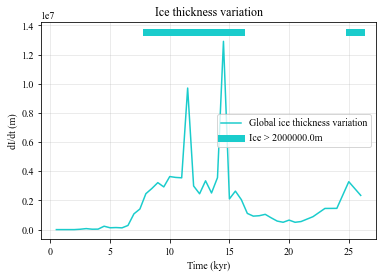

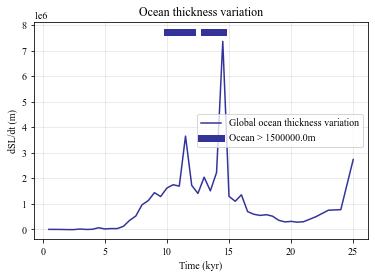

In [98]:
fig_sediment,ax_sediment=plt.subplots()
ax_sediment.plot(model.time_step[:-1],s_tot_[1:-1],color=sediment_color,label='Global sediment thickness variation')
ax_sediment.plot(model.time_step[:-1],s_tot[1:-1]+max(ax_sediment.get_ylim()),linewidth=7,color=sediment_color,label='Sediment > '+ str(sediment_ceil) +'m')
plt.xlabel('Time (kyr)')
plt.ylabel('dH/dt (m)')
plt.title('Sédiment thickness variation')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

fig_ice,ax_ice=plt.subplots()
ax_ice.plot(model.time_step[:-1],ice_tot_[1:-1],color=ice_color,label='Global ice thickness variation')
ax_ice.plot(model.time_step[:-1],ice_tot[1:-1]+max(ax_ice.get_ylim()),linewidth=7,color=ice_color,label='Ice > '+ str(ice_ceil) +'m')
plt.xlabel('Time (kyr)')
plt.ylabel('dI/dt (m)')
plt.title('Ice thickness variation')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

fig_ocean,ax_ocean=plt.subplots()
ax_ocean.plot(model.time_step[1:-1],ocean_tot_[:-1],color=ocean_color,label='Global ocean thickness variation')
ax_ocean.plot(model.time_step[1:-1],ocean_tot[:-1]+max(ax_ocean.get_ylim()),linewidth=7,color=ocean_color,label='Ocean > '+ str(ocean_ceil) +'m')
plt.xlabel('Time (kyr)')
plt.ylabel('dSL/dt (m)')
plt.title('Ocean thickness variation')
plt.grid(alpha=0.3)
plt.legend()
plt.show()


In [ ]:
fig_sediment.savefig(way+'sediment_amount.svg',dpi=300,format='svg')
fig_ocean.savefig(way+'sediment_ocean.svg',dpi=300,format='svg')
fig_ice.savefig(way+'sediment_ice.svg',dpi=300,format='svg')

## plot time

c:\Users\ahenry01\miniconda3\envs\SL_C0de\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning:

Casting complex values to real discards the imaginary part



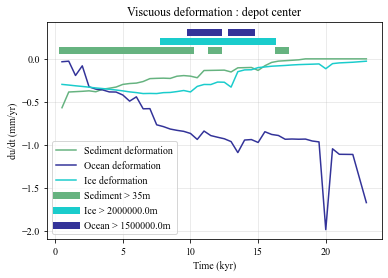

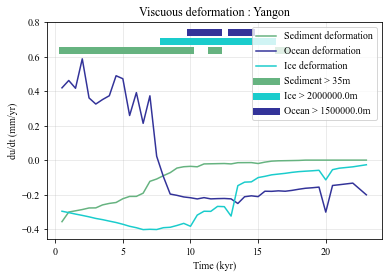

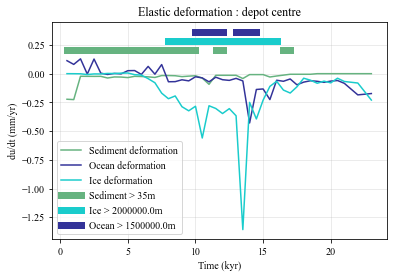

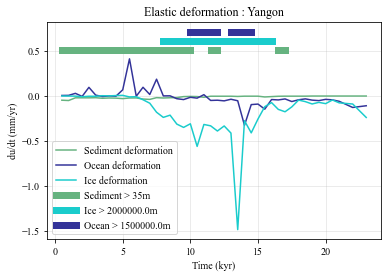

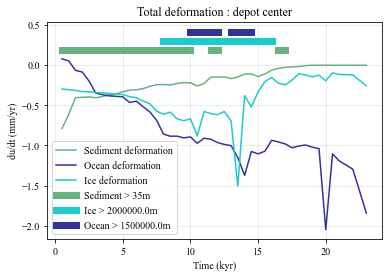

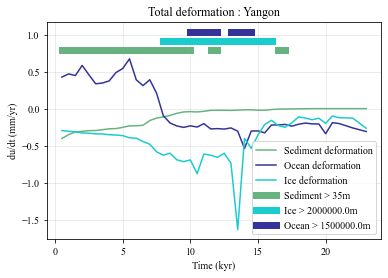

In [99]:
import matplotlib.pyplot as plt
#plt.plot(model.time_step[3:-1],y_e[2:-1])
fig_time_v_pt_1,ax_time_v_pt_1=plt.subplots()
ax_time_v_pt_1.plot(model.time_step[3:-1],y_v_s_pt_1[2:-1],label='Sediment deformation',color=sediment_color)
ax_time_v_pt_1.plot(model.time_step[3:-1],y_v_o_pt_1[2:-1],label='Ocean deformation',color=ocean_color)
ax_time_v_pt_1.plot(model.time_step[3:-1],y_v_i_pt_1[2:-1],label='Ice deformation',color=ice_color)
ax_time_v_pt_1.plot(model.time_step[3:-1],s_tot[4:-1]+max(ax_time_v_pt_1.get_ylim()),linewidth=7,color=sediment_color,label='Sediment > '+ str(sediment_ceil) +'m')
ax_time_v_pt_1.plot(model.time_step[3:-1],ice_tot[4:-1]+max(ax_time_v_pt_1.get_ylim()),linewidth=7,color=ice_color,label='Ice > '+ str(ice_ceil) +'m')
ax_time_v_pt_1.plot(model.time_step[3:-1],ocean_tot[2:-1]+max(ax_time_v_pt_1.get_ylim()),linewidth=7,color=ocean_color,label='Ocean > '+ str(ocean_ceil) +'m')
plt.xlabel('Time (kyr)')
plt.ylabel('du/dt (mm/yr)')
plt.title('Viscuous deformation : depot center')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

fig_time_v_pt_2,ax_time_v_pt_2=plt.subplots()
ax_time_v_pt_2.plot(model.time_step[3:-1],y_v_s_pt_2[2:-1],label='Sediment deformation',color=sediment_color)
ax_time_v_pt_2.plot(model.time_step[3:-1],y_v_o_pt_2[2:-1],label='Ocean deformation',color=ocean_color)
ax_time_v_pt_2.plot(model.time_step[3:-1],y_v_i_pt_2[2:-1],label='Ice deformation',color=ice_color)
ax_time_v_pt_2.plot(model.time_step[3:-1],s_tot[4:-1]+max(ax_time_v_pt_2.get_ylim()),linewidth=7,color=sediment_color,label='Sediment > '+ str(sediment_ceil) +'m')
ax_time_v_pt_2.plot(model.time_step[3:-1],ice_tot[4:-1]+max(ax_time_v_pt_2.get_ylim()),linewidth=7,color=ice_color,label='Ice > '+ str(ice_ceil) +'m')
ax_time_v_pt_2.plot(model.time_step[3:-1],ocean_tot[2:-1]+max(ax_time_v_pt_2.get_ylim()),linewidth=7,color=ocean_color,label='Ocean > '+ str(ocean_ceil) +'m')
plt.xlabel('Time (kyr)')
plt.ylabel('du/dt (mm/yr)')
plt.title('Viscuous deformation : Yangon')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

fig_time_e_pt_1,ax_time_e_pt_1=plt.subplots()
ax_time_e_pt_1.plot(model.time_step[3:-1],y_e_s_pt_1[2:-1],label='Sediment deformation',color=sediment_color)
ax_time_e_pt_1.plot(model.time_step[3:-1],y_e_o_pt_1[2:-1],label='Ocean deformation',color=ocean_color)
ax_time_e_pt_1.plot(model.time_step[3:-1],y_e_i_pt_1[2:-1],label='Ice deformation',color=ice_color)
ax_time_e_pt_1.plot(model.time_step[3:-1],s_tot[4:-1]+max(ax_time_e_pt_1.get_ylim()),linewidth=7,color=sediment_color,label='Sediment > '+ str(sediment_ceil) +'m')
ax_time_e_pt_1.plot(model.time_step[3:-1],ice_tot[4:-1]+max(ax_time_e_pt_1.get_ylim()),linewidth=7,color=ice_color,label='Ice > '+ str(ice_ceil) +'m')
ax_time_e_pt_1.plot(model.time_step[3:-1],ocean_tot[2:-1]+max(ax_time_e_pt_1.get_ylim()),linewidth=7,color=ocean_color,label='Ocean > '+ str(ocean_ceil) +'m')
plt.xlabel('Time (kyr)')
plt.ylabel('du/dt (mm/yr)')
plt.title('Elastic deformation : depot centre')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

fig_time_e_pt_2,ax_time_e_pt_2=plt.subplots()
ax_time_e_pt_2.plot(model.time_step[3:-1],y_e_s_pt_2[2:-1],label='Sediment deformation',color=sediment_color)
ax_time_e_pt_2.plot(model.time_step[3:-1],y_e_o_pt_2[2:-1],label='Ocean deformation',color=ocean_color)
ax_time_e_pt_2.plot(model.time_step[3:-1],y_e_i_pt_2[2:-1],label='Ice deformation',color=ice_color)
ax_time_e_pt_2.plot(model.time_step[3:-1],s_tot[4:-1]+max(ax_time_e_pt_2.get_ylim()),linewidth=7,color=sediment_color,label='Sediment > '+ str(sediment_ceil) +'m')
ax_time_e_pt_2.plot(model.time_step[3:-1],ice_tot[4:-1]+max(ax_time_e_pt_2.get_ylim()),linewidth=7,color=ice_color,label='Ice > '+ str(ice_ceil) +'m')
ax_time_e_pt_2.plot(model.time_step[3:-1],ocean_tot[2:-1]+max(ax_time_e_pt_2.get_ylim()),linewidth=7,color=ocean_color,label='Ocean > '+ str(ocean_ceil) +'m')
plt.xlabel('Time (kyr)')
plt.ylabel('du/dt (mm/yr)')
plt.title('Elastic deformation : Yangon')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

fig_time_tot_pt_1,ax_time_tot_pt_1=plt.subplots()
ax_time_tot_pt_1.plot(model.time_step[3:-1],y_e_s_pt_1[2:-1]+y_v_s_pt_1[2:-1],label='Sediment deformation',color=sediment_color)
ax_time_tot_pt_1.plot(model.time_step[3:-1],y_e_o_pt_1[2:-1]+y_v_o_pt_1[2:-1],label='Ocean deformation',color=ocean_color)
ax_time_tot_pt_1.plot(model.time_step[3:-1],y_e_i_pt_1[2:-1]+y_v_i_pt_1[2:-1],label='Ice deformation',color=ice_color)
ax_time_tot_pt_1.plot(model.time_step[3:-1],s_tot[4:-1]+max(ax_time_tot_pt_1.get_ylim()),linewidth=7,color=sediment_color,label='Sediment > '+ str(sediment_ceil) +'m')
ax_time_tot_pt_1.plot(model.time_step[3:-1],ice_tot[4:-1]+max(ax_time_tot_pt_1.get_ylim()),linewidth=7,color=ice_color,label='Ice > '+ str(ice_ceil) +'m')
ax_time_tot_pt_1.plot(model.time_step[3:-1],ocean_tot[2:-1]+max(ax_time_tot_pt_1.get_ylim()),linewidth=7,color=ocean_color,label='Ocean > '+ str(ocean_ceil) +'m')
plt.xlabel('Time (kyr)')
plt.ylabel('du/dt (mm/yr)')
plt.title('Total deformation : depot center')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

fig_time_tot_pt_2,ax_time_tot_pt_2=plt.subplots()
ax_time_tot_pt_2.plot(model.time_step[3:-1],y_e_s_pt_2[2:-1]+y_v_s_pt_2[2:-1],label='Sediment deformation',color=sediment_color)
ax_time_tot_pt_2.plot(model.time_step[3:-1],y_e_o_pt_2[2:-1]+y_v_o_pt_2[2:-1],label='Ocean deformation',color=ocean_color)
ax_time_tot_pt_2.plot(model.time_step[3:-1],y_e_i_pt_2[2:-1]+y_v_i_pt_2[2:-1],label='Ice deformation',color=ice_color)
ax_time_tot_pt_2.plot(model.time_step[3:-1],s_tot[4:-1]+max(ax_time_tot_pt_2.get_ylim()),linewidth=7,color=sediment_color,label='Sediment > '+ str(sediment_ceil) +'m')
ax_time_tot_pt_2.plot(model.time_step[3:-1],ice_tot[4:-1]+max(ax_time_tot_pt_2.get_ylim()),linewidth=7,color=ice_color,label='Ice > '+ str(ice_ceil) +'m')
ax_time_tot_pt_2.plot(model.time_step[3:-1],ocean_tot[2:-1]+max(ax_time_tot_pt_2.get_ylim()),linewidth=7,color=ocean_color,label='Ocean > '+ str(ocean_ceil) +'m')
plt.xlabel('Time (kyr)')
plt.ylabel('du/dt (mm/yr)')
plt.title('Total deformation : Yangon')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

In [ ]:
fig_time_v_pt_1.savefig(way+'time_v_t1.svg',dpi=300,format='svg')
fig_time_v_pt_2.savefig(way+'time_v_t2.svg',dpi=300,format='svg')
fig_time_e_pt_1.savefig(way+'time_e_t1.svg',dpi=300,format='svg')
fig_time_e_pt_2.savefig(way+'time_e_t2.svg',dpi=300,format='svg')
fig_time_tot_pt_1.savefig(way+'time_tot_t1.svg',dpi=300,format='svg')
fig_time_tot_pt_2.savefig(way+'time_tot_t2.svg',dpi=300,format='svg')

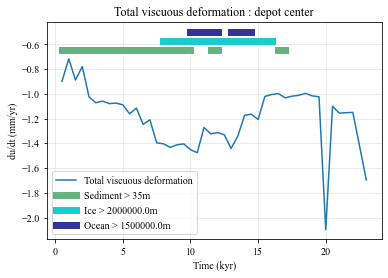

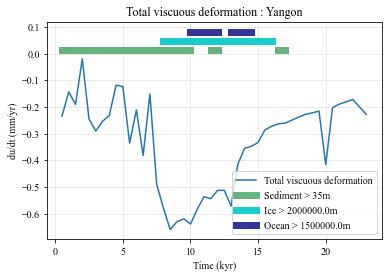

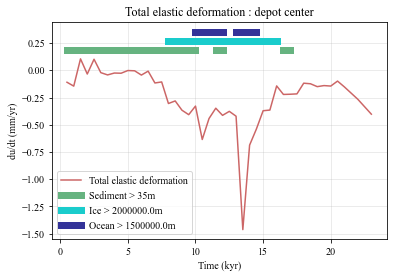

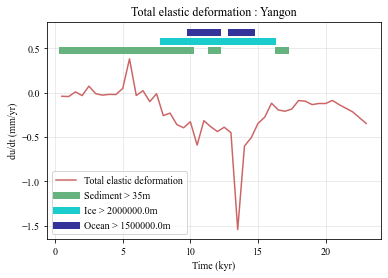

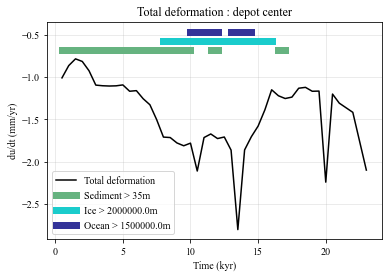

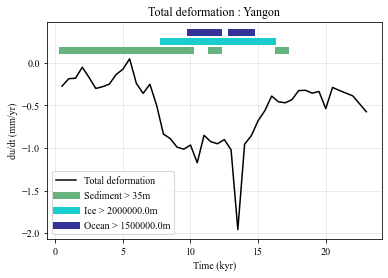

In [100]:
fig_time_tot_v_pt_1,ax_time_tot_v_pt_1=plt.subplots()
ax_time_tot_v_pt_1.plot(model.time_step[3:-1],y_v_o_pt_1[2:-1]+y_v_s_pt_1[2:-1]+y_v_i_pt_1[2:-1],label='Total viscuous deformation')
ax_time_tot_v_pt_1.plot(model.time_step[3:-1],s_tot[4:-1]+max(ax_time_tot_v_pt_1.get_ylim()),linewidth=7,color=sediment_color,label='Sediment > '+ str(sediment_ceil) +'m')
ax_time_tot_v_pt_1.plot(model.time_step[3:-1],ice_tot[4:-1]+max(ax_time_tot_v_pt_1.get_ylim()),linewidth=7,color=ice_color,label='Ice > '+ str(ice_ceil) +'m')
ax_time_tot_v_pt_1.plot(model.time_step[3:-1],ocean_tot[2:-1]+max(ax_time_tot_v_pt_1.get_ylim()),linewidth=7,color=ocean_color,label='Ocean > '+ str(ocean_ceil) +'m')
plt.xlabel('Time (kyr)')
plt.ylabel('du/dt (mm/yr)')
plt.title('Total viscuous deformation : depot center')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

fig_time_tot_v_pt_2,ax_time_tot_v_pt_2=plt.subplots()
ax_time_tot_v_pt_2.plot(model.time_step[3:-1],y_v_o_pt_2[2:-1]+y_v_s_pt_2[2:-1]+y_v_i_pt_2[2:-1],label='Total viscuous deformation')
ax_time_tot_v_pt_2.plot(model.time_step[3:-1],s_tot[4:-1]+max(ax_time_tot_v_pt_2.get_ylim()),linewidth=7,color=sediment_color,label='Sediment > '+ str(sediment_ceil) +'m')
ax_time_tot_v_pt_2.plot(model.time_step[3:-1],ice_tot[4:-1]+max(ax_time_tot_v_pt_2.get_ylim()),linewidth=7,color=ice_color,label='Ice > '+ str(ice_ceil) +'m')
ax_time_tot_v_pt_2.plot(model.time_step[3:-1],ocean_tot[2:-1]+max(ax_time_tot_v_pt_2.get_ylim()),linewidth=7,color=ocean_color,label='Ocean > '+ str(ocean_ceil) +'m')
plt.xlabel('Time (kyr)')
plt.ylabel('du/dt (mm/yr)')
plt.title('Total viscuous deformation : Yangon')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

fig_time_tot_e_pt_1,ax_time_tot_e_pt_1=plt.subplots()
ax_time_tot_e_pt_1.plot(model.time_step[3:-1],y_e_o_pt_1[2:-1]+y_e_s_pt_1[2:-1]+y_e_i_pt_1[2:-1],label='Total elastic deformation',color=(0.8,0.4,0.4))
ax_time_tot_e_pt_1.plot(model.time_step[3:-1],s_tot[4:-1]+max(ax_time_tot_e_pt_1.get_ylim()),linewidth=7,color=sediment_color,label='Sediment > '+ str(sediment_ceil) +'m')
ax_time_tot_e_pt_1.plot(model.time_step[3:-1],ice_tot[4:-1]+max(ax_time_tot_e_pt_1.get_ylim()),linewidth=7,color=ice_color,label='Ice > '+ str(ice_ceil) +'m')
ax_time_tot_e_pt_1.plot(model.time_step[3:-1],ocean_tot[2:-1]+max(ax_time_tot_e_pt_1.get_ylim()),linewidth=7,color=ocean_color,label='Ocean > '+ str(ocean_ceil) +'m')
plt.xlabel('Time (kyr)')
plt.ylabel('du/dt (mm/yr)')
plt.title('Total elastic deformation : depot center')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

fig_time_tot_e_pt_2,ax_time_tot_e_pt_2=plt.subplots()
ax_time_tot_e_pt_2.plot(model.time_step[3:-1],y_e_o_pt_2[2:-1]+y_e_s_pt_2[2:-1]+y_e_i_pt_2[2:-1],label='Total elastic deformation',color=(0.8,0.4,0.4))
ax_time_tot_e_pt_2.plot(model.time_step[3:-1],s_tot[4:-1]+max(ax_time_tot_e_pt_2.get_ylim()),linewidth=7,color=sediment_color,label='Sediment > '+ str(sediment_ceil) +'m')
ax_time_tot_e_pt_2.plot(model.time_step[3:-1],ice_tot[4:-1]+max(ax_time_tot_e_pt_2.get_ylim()),linewidth=7,color=ice_color,label='Ice > '+ str(ice_ceil) +'m')
ax_time_tot_e_pt_2.plot(model.time_step[3:-1],ocean_tot[2:-1]+max(ax_time_tot_e_pt_2.get_ylim()),linewidth=7,color=ocean_color,label='Ocean > '+ str(ocean_ceil) +'m')
plt.xlabel('Time (kyr)')
plt.ylabel('du/dt (mm/yr)')
plt.title('Total elastic deformation : Yangon')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

fig_time_tot_tot_pt_1,ax_time_tot_tot_pt_1=plt.subplots()
ax_time_tot_tot_pt_1.plot(model.time_step[3:-1],y_e_o_pt_1[2:-1]+y_e_s_pt_1[2:-1]+y_e_i_pt_1[2:-1]+y_v_o_pt_1[2:-1]+y_v_s_pt_1[2:-1]+y_v_i_pt_1[2:-1],label='Total deformation',color='k')
ax_time_tot_tot_pt_1.plot(model.time_step[3:-1],s_tot[4:-1]+max(ax_time_tot_tot_pt_1.get_ylim()),linewidth=7,color=sediment_color,label='Sediment > '+ str(sediment_ceil) +'m')
ax_time_tot_tot_pt_1.plot(model.time_step[3:-1],ice_tot[4:-1]+max(ax_time_tot_tot_pt_1.get_ylim()),linewidth=7,color=ice_color,label='Ice > '+ str(ice_ceil) +'m')
ax_time_tot_tot_pt_1.plot(model.time_step[3:-1],ocean_tot[2:-1]+max(ax_time_tot_tot_pt_1.get_ylim()),linewidth=7,color=ocean_color,label='Ocean > '+ str(ocean_ceil) +'m')
plt.xlabel('Time (kyr)')
plt.ylabel('du/dt (mm/yr)')
plt.title('Total deformation : depot center')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

fig_time_tot_tot_pt_2,ax_time_tot_tot_pt_2=plt.subplots()
ax_time_tot_tot_pt_2.plot(model.time_step[3:-1],y_e_o_pt_2[2:-1]+y_e_s_pt_2[2:-1]+y_e_i_pt_2[2:-1]+y_v_o_pt_2[2:-1]+y_v_s_pt_2[2:-1]+y_v_i_pt_2[2:-1],label='Total deformation',color='k')
ax_time_tot_tot_pt_2.plot(model.time_step[3:-1],s_tot[4:-1]+max(ax_time_tot_tot_pt_2.get_ylim()),linewidth=7,color=sediment_color,label='Sediment > '+ str(sediment_ceil) +'m')
ax_time_tot_tot_pt_2.plot(model.time_step[3:-1],ice_tot[4:-1]+max(ax_time_tot_tot_pt_2.get_ylim()),linewidth=7,color=ice_color,label='Ice > '+ str(ice_ceil) +'m')
ax_time_tot_tot_pt_2.plot(model.time_step[3:-1],ocean_tot[2:-1]+max(ax_time_tot_tot_pt_2.get_ylim()),linewidth=7,color=ocean_color,label='Ocean > '+ str(ocean_ceil) +'m')
plt.xlabel('Time (kyr)')
plt.ylabel('du/dt (mm/yr)')
plt.title('Total deformation : Yangon')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

In [ ]:
fig_time_tot_v_pt_1.savefig(way+'time_total_v_t1.svg',dpi=300,format='svg')
fig_time_tot_v_pt_2.savefig(way+'time_total_v_t2.svg',dpi=300,format='svg')
fig_time_tot_e_pt_1.savefig(way+'time_total_e_t1.svg',dpi=300,format='svg')
fig_time_tot_e_pt_2.savefig(way+'time_total_e_t2.svg',dpi=300,format='svg')
fig_time_tot_tot_pt_1.savefig(way+'time_tot_tot_t1.svg',dpi=300,format='svg')
fig_time_tot_tot_pt_2.savefig(way+'time_tot_tot_t2.svg',dpi=300,format='svg')

# Geoïd deformation

## map G

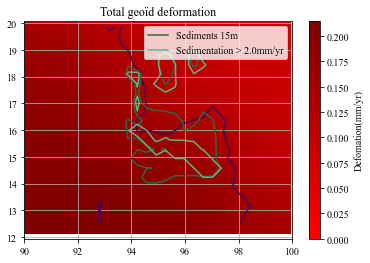

In [19]:
ax_tot_G,D_tot,D_tot_local,fig_tot_G=model.plot_map_derivation((model.delG_v_o+model.delG_v_i+model.delG_v_s+model.delG_e_o+model.delG_e_i+model.delG_e_s)*1000,0.5,lat=lat_map,lon=lon_map,title='Total geoïd deformation',colorbar_title='Defomation(mm/yr)')
ax_tot_G.contour(long,lati,sed_v_cut,levels=[sediment_v_ceil],colors=[sediment_color_dark])
ax_tot_G.plot([-1,-0.1],[-95,-94],label='Sediments '+ str(sediment_v_ceil)+'m',color=sediment_color_dark)
ax_tot_G.contour(long,lati,sed_cut,levels=[sediment_ceil],colors=[sediment_color])
ax_tot_G.plot([-1,-0.1],[-95,-94],label='Sedimentation > '+ str(sediment_ceil_derived*1000) +'mm/yr',color=sediment_color)
ax_tot_G.axis([lon_map[0],lon_map[1],lat_map[0],lat_map[1]])
ax_tot_G.legend()

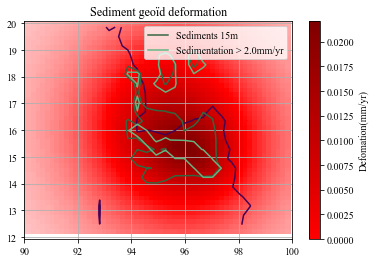

In [20]:
ax_tot_G_s,D_tot_G_s,D_tot_G_s_local,fig_tot_G_s=model.plot_map_derivation((model.delG_e_s+model.delG_v_s)*1000,0.5,lat=lat_map,lon=lon_map,title='Sediment geoïd deformation',colorbar_title='Defomation(mm/yr)')
ax_tot_G_s.contour(long,lati,sed_v_cut,levels=[sediment_v_ceil],colors=[sediment_color_dark])
ax_tot_G_s.plot([-1,-0.1],[-95,-94],label='Sediments '+ str(sediment_v_ceil)+'m',color=sediment_color_dark)
ax_tot_G_s.contour(long,lati,sed_cut,levels=[sediment_ceil],colors=[sediment_color])
ax_tot_G_s.plot([-1,-0.1],[-95,-94],label='Sedimentation > '+ str(sediment_ceil_derived*1000) +'mm/yr',color=sediment_color)
ax_tot_G_s.axis([lon_map[0],lon_map[1],lat_map[0],lat_map[1]])
ax_tot_G_s.legend()

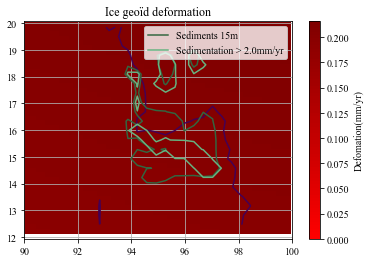

In [21]:
ax_tot_G_i,D_tot_G_i,D_tot_G_i_local,fig_tot_G_i=model.plot_map_derivation((model.delG_e_i+model.delG_v_i)*1000,0.5,lat=lat_map,lon=lon_map,title='Ice geoïd deformation',colorbar_title='Defomation(mm/yr)')
ax_tot_G_i.contour(long,lati,sed_v_cut,levels=[sediment_v_ceil],colors=[sediment_color_dark])
ax_tot_G_i.plot([-1,-0.1],[-95,-94],label='Sediments '+ str(sediment_v_ceil)+'m',color=sediment_color_dark)
ax_tot_G_i.contour(long,lati,sed_cut,levels=[sediment_ceil],colors=[sediment_color])
ax_tot_G_i.plot([-1,-0.1],[-95,-94],label='Sedimentation > '+ str(sediment_ceil_derived*1000) +'mm/yr',color=sediment_color)
ax_tot_G_i.axis([lon_map[0],lon_map[1],lat_map[0],lat_map[1]])
ax_tot_G_i.legend()

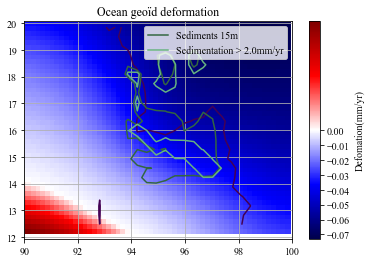

In [22]:
ax_tot_G_o,D_tot_G_o,D_tot_G_o_local,fig_tot_G_o=model.plot_map_derivation((model.delG_e_o+model.delG_v_o)*1000,0.5,lat=lat_map,lon=lon_map,title='Ocean geoïd deformation',colorbar_title='Defomation(mm/yr)')
ax_tot_G_o.contour(long,lati,sed_v_cut,levels=[sediment_v_ceil],colors=[sediment_color_dark])
ax_tot_G_o.plot([-1,-0.1],[-95,-94],label='Sediments '+ str(sediment_v_ceil)+'m',color=sediment_color_dark)
ax_tot_G_o.contour(long,lati,sed_cut,levels=[sediment_ceil],colors=[sediment_color])
ax_tot_G_o.plot([-1,-0.1],[-95,-94],label='Sedimentation > '+ str(sediment_ceil_derived*1000) +'mm/yr',color=sediment_color)
ax_tot_G_o.axis([lon_map[0],lon_map[1],lat_map[0],lat_map[1]])
ax_tot_G_o.legend()

In [ ]:
fig_tot_G.savefig(way+'map_tot_G.svg',format='svg')
fig_tot_G_s.savefig(way+'map_tot_G_s.svg',format='svg')
fig_tot_G_i.savefig(way+'map_tot_G_i.svg',format='svg')
fig_tot_G_o.savefig(way+'map_tot_G_o.svg',format='svg')

## At point G

c:\Users\ahenry01\miniconda3\envs\SL_C0de\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning:

Casting complex values to real discards the imaginary part



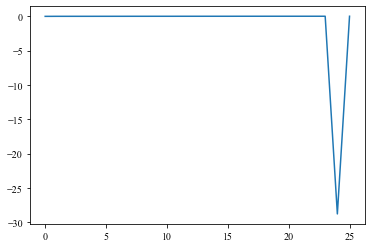

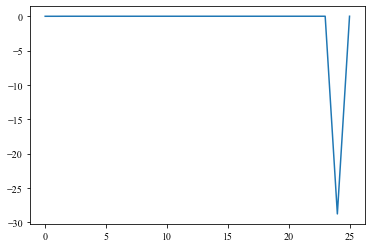

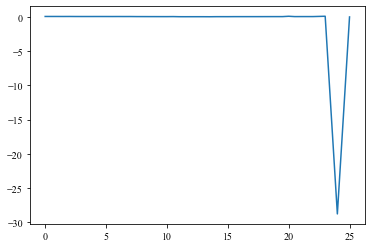

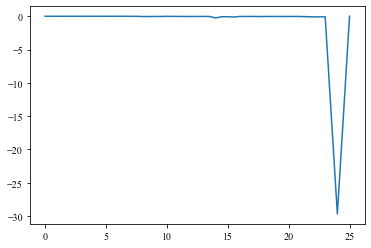

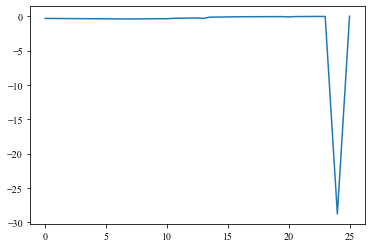

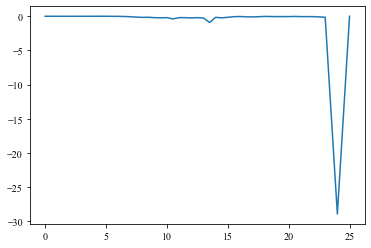

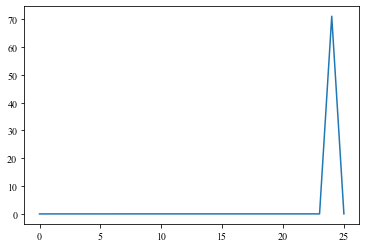

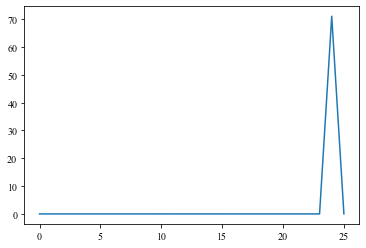

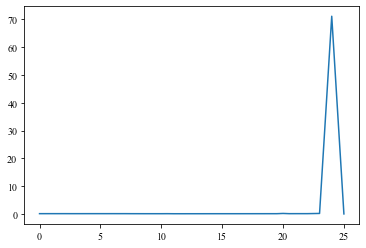

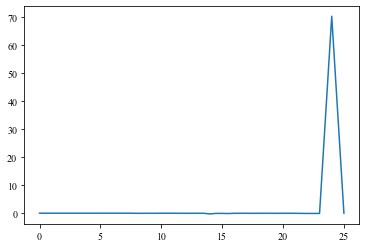

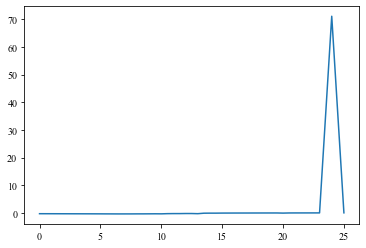

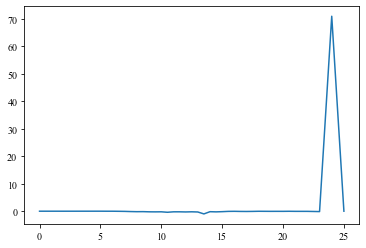

In [29]:
ax,y_v_s_pt_1=model.plot_at_point_derivation(-model.delG_v_s*10**3,lat_pt_1,lon_pt_1)
ax,y_e_s_pt_1=model.plot_at_point_derivation(-model.delG_e_s*10**3,lat_pt_1,lon_pt_1)
ax,y_v_o_pt_1=model.plot_at_point_derivation(-model.delG_v_o*10**3,lat_pt_1,lon_pt_1)
ax,y_e_o_pt_1=model.plot_at_point_derivation(-model.delG_e_o*10**3,lat_pt_1,lon_pt_1)
ax,y_v_i_pt_1=model.plot_at_point_derivation(-model.delG_v_i*10**3,lat_pt_1,lon_pt_1)
ax,y_e_i_pt_1=model.plot_at_point_derivation(-model.delG_e_i*10**3,lat_pt_1,lon_pt_1)

ax,y_v_s_pt_2=model.plot_at_point_derivation(-model.delG_v_s*10**3,lat_pt_2,lon_pt_2)
ax,y_e_s_pt_2=model.plot_at_point_derivation(-model.delG_e_s*10**3,lat_pt_2,lon_pt_2)
ax,y_v_o_pt_2=model.plot_at_point_derivation(-model.delG_v_o*10**3,lat_pt_2,lon_pt_2)
ax,y_e_o_pt_2=model.plot_at_point_derivation(-model.delG_e_o*10**3,lat_pt_2,lon_pt_2)
ax,y_v_i_pt_2=model.plot_at_point_derivation(-model.delG_v_i*10**3,lat_pt_2,lon_pt_2)
ax,y_e_i_pt_2=model.plot_at_point_derivation(-model.delG_e_i*10**3,lat_pt_2,lon_pt_2)

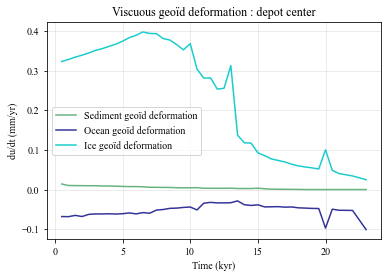

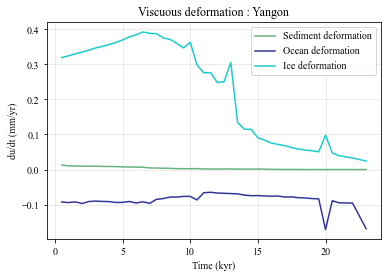

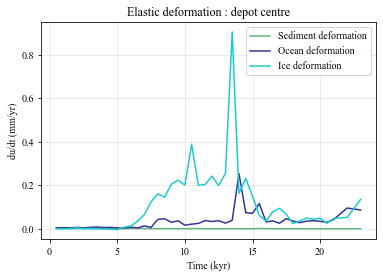

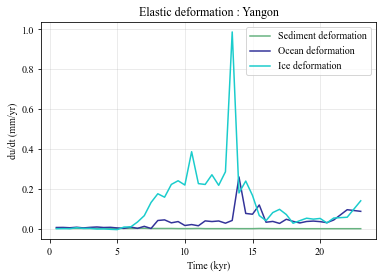

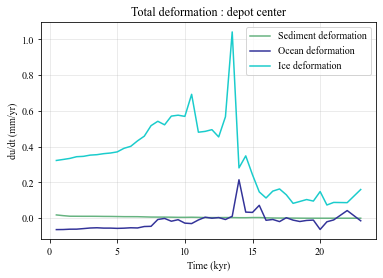

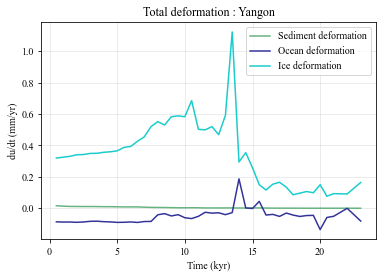

In [36]:
import matplotlib.pyplot as plt
#plt.plot(model.time_step[3:-1],y_e[2:-1])
fig_time_v_pt_1,ax_time_v_pt_1=plt.subplots()
ax_time_v_pt_1.plot(model.time_step[3:-1],-y_v_s_pt_1[2:-1],label='Sediment geoïd deformation',color=sediment_color)
ax_time_v_pt_1.plot(model.time_step[3:-1],-y_v_o_pt_1[2:-1],label='Ocean geoïd deformation',color=ocean_color)
ax_time_v_pt_1.plot(model.time_step[3:-1],-y_v_i_pt_1[2:-1],label='Ice geoïd deformation',color=ice_color)
# ax_time_v_pt_1.plot(model.time_step[3:-1],s_tot[4:-1]+max(ax_time_v_pt_1.get_ylim()),linewidth=7,color=sediment_color,label='Sediment > '+ str(sediment_ceil) +'m')
# ax_time_v_pt_1.plot(model.time_step[3:-1],ice_tot[4:-1]+max(ax_time_v_pt_1.get_ylim()),linewidth=7,color=ice_color,label='Ice > '+ str(ice_ceil) +'m')
# ax_time_v_pt_1.plot(model.time_step[3:-1],ocean_tot[2:-1]+max(ax_time_v_pt_1.get_ylim()),linewidth=7,color=ocean_color,label='Ocean > '+ str(ocean_ceil) +'m')
plt.xlabel('Time (kyr)')
plt.ylabel('du/dt (mm/yr)')
plt.title('Viscuous geoïd deformation : depot center')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

fig_time_v_pt_2,ax_time_v_pt_2=plt.subplots()
ax_time_v_pt_2.plot(model.time_step[3:-1],-y_v_s_pt_2[2:-1],label='Sediment deformation',color=sediment_color)
ax_time_v_pt_2.plot(model.time_step[3:-1],-y_v_o_pt_2[2:-1],label='Ocean deformation',color=ocean_color)
ax_time_v_pt_2.plot(model.time_step[3:-1],-y_v_i_pt_2[2:-1],label='Ice deformation',color=ice_color)
# ax_time_v_pt_2.plot(model.time_step[3:-1],s_tot[4:-1]+max(ax_time_v_pt_2.get_ylim()),linewidth=7,color=sediment_color,label='Sediment > '+ str(sediment_ceil) +'m')
# ax_time_v_pt_2.plot(model.time_step[3:-1],ice_tot[4:-1]+max(ax_time_v_pt_2.get_ylim()),linewidth=7,color=ice_color,label='Ice > '+ str(ice_ceil) +'m')
# ax_time_v_pt_2.plot(model.time_step[3:-1],ocean_tot[2:-1]+max(ax_time_v_pt_2.get_ylim()),linewidth=7,color=ocean_color,label='Ocean > '+ str(ocean_ceil) +'m')
plt.xlabel('Time (kyr)')
plt.ylabel('du/dt (mm/yr)')
plt.title('Viscuous deformation : Yangon')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

fig_time_e_pt_1,ax_time_e_pt_1=plt.subplots()
ax_time_e_pt_1.plot(model.time_step[3:-1],-y_e_s_pt_1[2:-1],label='Sediment deformation',color=sediment_color)
ax_time_e_pt_1.plot(model.time_step[3:-1],-y_e_o_pt_1[2:-1],label='Ocean deformation',color=ocean_color)
ax_time_e_pt_1.plot(model.time_step[3:-1],-y_e_i_pt_1[2:-1],label='Ice deformation',color=ice_color)
# ax_time_e_pt_1.plot(model.time_step[3:-1],s_tot[4:-1]+max(ax_time_e_pt_1.get_ylim()),linewidth=7,color=sediment_color,label='Sediment > '+ str(sediment_ceil) +'m')
# ax_time_e_pt_1.plot(model.time_step[3:-1],ice_tot[4:-1]+max(ax_time_e_pt_1.get_ylim()),linewidth=7,color=ice_color,label='Ice > '+ str(ice_ceil) +'m')
# ax_time_e_pt_1.plot(model.time_step[3:-1],ocean_tot[2:-1]+max(ax_time_e_pt_1.get_ylim()),linewidth=7,color=ocean_color,label='Ocean > '+ str(ocean_ceil) +'m')
plt.xlabel('Time (kyr)')
plt.ylabel('du/dt (mm/yr)')
plt.title('Elastic deformation : depot centre')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

fig_time_e_pt_2,ax_time_e_pt_2=plt.subplots()
ax_time_e_pt_2.plot(model.time_step[3:-1],-y_e_s_pt_2[2:-1],label='Sediment deformation',color=sediment_color)
ax_time_e_pt_2.plot(model.time_step[3:-1],-y_e_o_pt_2[2:-1],label='Ocean deformation',color=ocean_color)
ax_time_e_pt_2.plot(model.time_step[3:-1],-y_e_i_pt_2[2:-1],label='Ice deformation',color=ice_color)
# ax_time_e_pt_2.plot(model.time_step[3:-1],s_tot[4:-1]+max(ax_time_e_pt_2.get_ylim()),linewidth=7,color=sediment_color,label='Sediment > '+ str(sediment_ceil) +'m')
# ax_time_e_pt_2.plot(model.time_step[3:-1],ice_tot[4:-1]+max(ax_time_e_pt_2.get_ylim()),linewidth=7,color=ice_color,label='Ice > '+ str(ice_ceil) +'m')
# ax_time_e_pt_2.plot(model.time_step[3:-1],ocean_tot[2:-1]+max(ax_time_e_pt_2.get_ylim()),linewidth=7,color=ocean_color,label='Ocean > '+ str(ocean_ceil) +'m')
plt.xlabel('Time (kyr)')
plt.ylabel('du/dt (mm/yr)')
plt.title('Elastic deformation : Yangon')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

fig_time_tot_pt_1,ax_time_tot_pt_1=plt.subplots()
ax_time_tot_pt_1.plot(model.time_step[3:-1],-y_e_s_pt_1[2:-1]-y_v_s_pt_1[2:-1],label='Sediment deformation',color=sediment_color)
ax_time_tot_pt_1.plot(model.time_step[3:-1],-y_e_o_pt_1[2:-1]-y_v_o_pt_1[2:-1],label='Ocean deformation',color=ocean_color)
ax_time_tot_pt_1.plot(model.time_step[3:-1],-y_e_i_pt_1[2:-1]-y_v_i_pt_1[2:-1],label='Ice deformation',color=ice_color)
# ax_time_tot_pt_1.plot(model.time_step[3:-1],s_tot[4:-1]+max(ax_time_tot_pt_1.get_ylim()),linewidth=7,color=sediment_color,label='Sediment > '+ str(sediment_ceil) +'m')
# ax_time_tot_pt_1.plot(model.time_step[3:-1],ice_tot[4:-1]+max(ax_time_tot_pt_1.get_ylim()),linewidth=7,color=ice_color,label='Ice > '+ str(ice_ceil) +'m')
# ax_time_tot_pt_1.plot(model.time_step[3:-1],ocean_tot[2:-1]+max(ax_time_tot_pt_1.get_ylim()),linewidth=7,color=ocean_color,label='Ocean > '+ str(ocean_ceil) +'m')
plt.xlabel('Time (kyr)')
plt.ylabel('du/dt (mm/yr)')
plt.title('Total deformation : depot center')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

fig_time_tot_pt_2,ax_time_tot_pt_2=plt.subplots()
ax_time_tot_pt_2.plot(model.time_step[3:-1],-y_e_s_pt_2[2:-1]-y_v_s_pt_2[2:-1],label='Sediment deformation',color=sediment_color)
ax_time_tot_pt_2.plot(model.time_step[3:-1],-y_e_o_pt_2[2:-1]-y_v_o_pt_2[2:-1],label='Ocean deformation',color=ocean_color)
ax_time_tot_pt_2.plot(model.time_step[3:-1],-y_e_i_pt_2[2:-1]-y_v_i_pt_2[2:-1],label='Ice deformation',color=ice_color)
# ax_time_tot_pt_2.plot(model.time_step[3:-1],s_tot[4:-1]+max(ax_time_tot_pt_2.get_ylim()),linewidth=7,color=sediment_color,label='Sediment > '+ str(sediment_ceil) +'m')
# ax_time_tot_pt_2.plot(model.time_step[3:-1],ice_tot[4:-1]+max(ax_time_tot_pt_2.get_ylim()),linewidth=7,color=ice_color,label='Ice > '+ str(ice_ceil) +'m')
# ax_time_tot_pt_2.plot(model.time_step[3:-1],ocean_tot[2:-1]+max(ax_time_tot_pt_2.get_ylim()),linewidth=7,color=ocean_color,label='Ocean > '+ str(ocean_ceil) +'m')
plt.xlabel('Time (kyr)')
plt.ylabel('du/dt (mm/yr)')
plt.title('Total deformation : Yangon')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

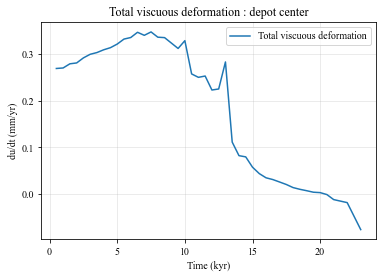

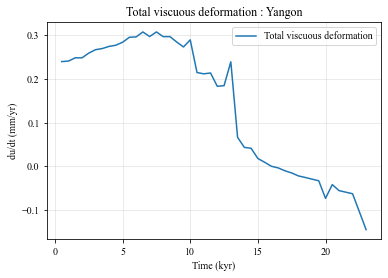

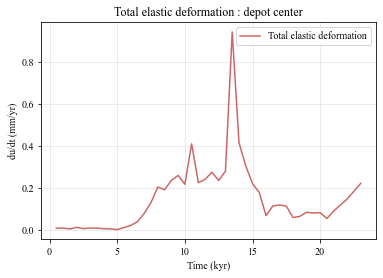

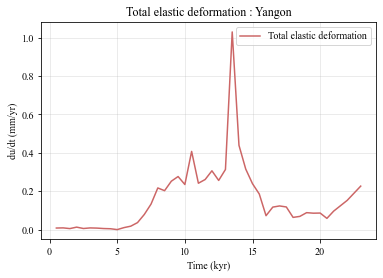

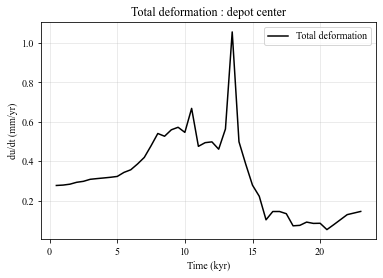

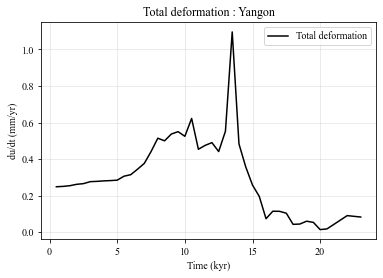

In [37]:
fig_time_tot_v_pt_1,ax_time_tot_v_pt_1=plt.subplots()
ax_time_tot_v_pt_1.plot(model.time_step[3:-1],-(y_v_o_pt_1[2:-1]+y_v_s_pt_1[2:-1]+y_v_i_pt_1[2:-1]),label='Total viscuous deformation')
# ax_time_tot_v_pt_1.plot(model.time_step[3:-1],s_tot[4:-1]+max(ax_time_tot_v_pt_1.get_ylim()),linewidth=7,color=sediment_color,label='Sediment > '+ str(sediment_ceil) +'m')
# ax_time_tot_v_pt_1.plot(model.time_step[3:-1],ice_tot[4:-1]+max(ax_time_tot_v_pt_1.get_ylim()),linewidth=7,color=ice_color,label='Ice > '+ str(ice_ceil) +'m')
# ax_time_tot_v_pt_1.plot(model.time_step[3:-1],ocean_tot[2:-1]+max(ax_time_tot_v_pt_1.get_ylim()),linewidth=7,color=ocean_color,label='Ocean > '+ str(ocean_ceil) +'m')
plt.xlabel('Time (kyr)')
plt.ylabel('du/dt (mm/yr)')
plt.title('Total viscuous deformation : depot center')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

fig_time_tot_v_pt_2,ax_time_tot_v_pt_2=plt.subplots()
ax_time_tot_v_pt_2.plot(model.time_step[3:-1],-(y_v_o_pt_2[2:-1]+y_v_s_pt_2[2:-1]+y_v_i_pt_2[2:-1]),label='Total viscuous deformation')
# ax_time_tot_v_pt_2.plot(model.time_step[3:-1],s_tot[4:-1]+max(ax_time_tot_v_pt_2.get_ylim()),linewidth=7,color=sediment_color,label='Sediment > '+ str(sediment_ceil) +'m')
# ax_time_tot_v_pt_2.plot(model.time_step[3:-1],ice_tot[4:-1]+max(ax_time_tot_v_pt_2.get_ylim()),linewidth=7,color=ice_color,label='Ice > '+ str(ice_ceil) +'m')
# ax_time_tot_v_pt_2.plot(model.time_step[3:-1],ocean_tot[2:-1]+max(ax_time_tot_v_pt_2.get_ylim()),linewidth=7,color=ocean_color,label='Ocean > '+ str(ocean_ceil) +'m')
plt.xlabel('Time (kyr)')
plt.ylabel('du/dt (mm/yr)')
plt.title('Total viscuous deformation : Yangon')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

fig_time_tot_e_pt_1,ax_time_tot_e_pt_1=plt.subplots()
ax_time_tot_e_pt_1.plot(model.time_step[3:-1],-(y_e_o_pt_1[2:-1]+y_e_s_pt_1[2:-1]+y_e_i_pt_1[2:-1]),label='Total elastic deformation',color=(0.8,0.4,0.4))
# ax_time_tot_e_pt_1.plot(model.time_step[3:-1],s_tot[4:-1]+max(ax_time_tot_e_pt_1.get_ylim()),linewidth=7,color=sediment_color,label='Sediment > '+ str(sediment_ceil) +'m')
# ax_time_tot_e_pt_1.plot(model.time_step[3:-1],ice_tot[4:-1]+max(ax_time_tot_e_pt_1.get_ylim()),linewidth=7,color=ice_color,label='Ice > '+ str(ice_ceil) +'m')
# ax_time_tot_e_pt_1.plot(model.time_step[3:-1],ocean_tot[2:-1]+max(ax_time_tot_e_pt_1.get_ylim()),linewidth=7,color=ocean_color,label='Ocean > '+ str(ocean_ceil) +'m')
plt.xlabel('Time (kyr)')
plt.ylabel('du/dt (mm/yr)')
plt.title('Total elastic deformation : depot center')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

fig_time_tot_e_pt_2,ax_time_tot_e_pt_2=plt.subplots()
ax_time_tot_e_pt_2.plot(model.time_step[3:-1],-(y_e_o_pt_2[2:-1]+y_e_s_pt_2[2:-1]+y_e_i_pt_2[2:-1]),label='Total elastic deformation',color=(0.8,0.4,0.4))
# ax_time_tot_e_pt_2.plot(model.time_step[3:-1],s_tot[4:-1]+max(ax_time_tot_e_pt_2.get_ylim()),linewidth=7,color=sediment_color,label='Sediment > '+ str(sediment_ceil) +'m')
# ax_time_tot_e_pt_2.plot(model.time_step[3:-1],ice_tot[4:-1]+max(ax_time_tot_e_pt_2.get_ylim()),linewidth=7,color=ice_color,label='Ice > '+ str(ice_ceil) +'m')
# ax_time_tot_e_pt_2.plot(model.time_step[3:-1],ocean_tot[2:-1]+max(ax_time_tot_e_pt_2.get_ylim()),linewidth=7,color=ocean_color,label='Ocean > '+ str(ocean_ceil) +'m')
plt.xlabel('Time (kyr)')
plt.ylabel('du/dt (mm/yr)')
plt.title('Total elastic deformation : Yangon')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

fig_time_tot_tot_pt_1,ax_time_tot_tot_pt_1=plt.subplots()
ax_time_tot_tot_pt_1.plot(model.time_step[3:-1],-(y_e_o_pt_1[2:-1]+y_e_s_pt_1[2:-1]+y_e_i_pt_1[2:-1]+y_v_o_pt_1[2:-1]+y_v_s_pt_1[2:-1]+y_v_i_pt_1[2:-1]),label='Total deformation',color='k')
# ax_time_tot_tot_pt_1.plot(model.time_step[3:-1],s_tot[4:-1]+max(ax_time_tot_tot_pt_1.get_ylim()),linewidth=7,color=sediment_color,label='Sediment > '+ str(sediment_ceil) +'m')
# ax_time_tot_tot_pt_1.plot(model.time_step[3:-1],ice_tot[4:-1]+max(ax_time_tot_tot_pt_1.get_ylim()),linewidth=7,color=ice_color,label='Ice > '+ str(ice_ceil) +'m')
# ax_time_tot_tot_pt_1.plot(model.time_step[3:-1],ocean_tot[2:-1]+max(ax_time_tot_tot_pt_1.get_ylim()),linewidth=7,color=ocean_color,label='Ocean > '+ str(ocean_ceil) +'m')
plt.xlabel('Time (kyr)')
plt.ylabel('du/dt (mm/yr)')
plt.title('Total deformation : depot center')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

fig_time_tot_tot_pt_2,ax_time_tot_tot_pt_2=plt.subplots()
ax_time_tot_tot_pt_2.plot(model.time_step[3:-1],-(y_e_o_pt_2[2:-1]+y_e_s_pt_2[2:-1]+y_e_i_pt_2[2:-1]+y_v_o_pt_2[2:-1]+y_v_s_pt_2[2:-1]+y_v_i_pt_2[2:-1]),label='Total deformation',color='k')
# ax_time_tot_tot_pt_2.plot(model.time_step[3:-1],s_tot[4:-1]+max(ax_time_tot_tot_pt_2.get_ylim()),linewidth=7,color=sediment_color,label='Sediment > '+ str(sediment_ceil) +'m')
# ax_time_tot_tot_pt_2.plot(model.time_step[3:-1],ice_tot[4:-1]+max(ax_time_tot_tot_pt_2.get_ylim()),linewidth=7,color=ice_color,label='Ice > '+ str(ice_ceil) +'m')
# ax_time_tot_tot_pt_2.plot(model.time_step[3:-1],ocean_tot[2:-1]+max(ax_time_tot_tot_pt_2.get_ylim()),linewidth=7,color=ocean_color,label='Ocean > '+ str(ocean_ceil) +'m')
plt.xlabel('Time (kyr)')
plt.ylabel('du/dt (mm/yr)')
plt.title('Total deformation : Yangon')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

## Transect G 

In [24]:
import numpy as np
from scipy import interpolate
import math

l=200


lat_trans_1=np.linspace(T_1_lat[0],T_1_lat[1],l)
lon_trans_1=np.linspace(T_1_lon[0],T_1_lon[1],l)

lat_trans_2=np.linspace(T_2_lat[0],T_2_lat[1],l)
lon_trans_2=np.linspace(T_2_lon[0],T_2_lon[1],l)

elons_res,lats_res=np.meshgrid(model.elons_res,model.lats_res)

D_lin_tot_G_s_t_1=interpolate.griddata((elons_res.flatten(),lats_res.flatten()),D_tot_G_s.flatten(),(lon_trans_1,lat_trans_1),method='linear')
D_lin_tot_G_i_t_1=interpolate.griddata((elons_res.flatten(),lats_res.flatten()),D_tot_G_i.flatten(),(lon_trans_1,lat_trans_1),method='linear')
D_lin_tot_G_o_t_1=interpolate.griddata((elons_res.flatten(),lats_res.flatten()),D_tot_G_o.flatten(),(lon_trans_1,lat_trans_1),method='linear')
rad_lat_t_1=math.pi*lat_trans_1/180
rad_lon_t_1=math.pi*lon_trans_1/180
L_t_1=6371*np.arccos(np.cos(rad_lat_t_1[0])*np.cos(rad_lat_t_1)+np.sin(rad_lat_t_1[0])*np.sin(rad_lat_t_1)*np.cos(rad_lon_t_1[0]-rad_lon_t_1))
L_t_1[0]=0

D_lin_tot_G_s_t_2=interpolate.griddata((elons_res.flatten(),lats_res.flatten()),D_tot_G_s.flatten(),(lon_trans_2,lat_trans_2),method='linear')
D_lin_tot_G_i_t_2=interpolate.griddata((elons_res.flatten(),lats_res.flatten()),D_tot_G_i.flatten(),(lon_trans_2,lat_trans_2),method='linear')
D_lin_tot_G_o_t_2=interpolate.griddata((elons_res.flatten(),lats_res.flatten()),D_tot_G_o.flatten(),(lon_trans_2,lat_trans_2),method='linear')
rad_lat_t_2=math.pi*lat_trans_2/180
rad_lon_t_2=math.pi*lon_trans_2/180
L_t_2=6371*np.arccos(np.cos(rad_lat_t_2[0])*np.cos(rad_lat_t_2)+np.sin(rad_lat_t_2[0])*np.sin(rad_lat_t_2)*np.cos(rad_lon_t_2[0]-rad_lon_t_2))
L_t_2[0]=0

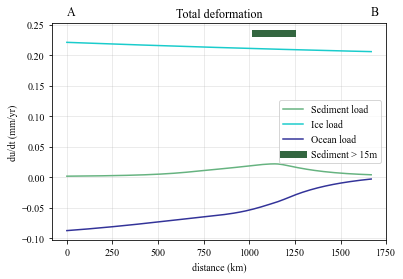

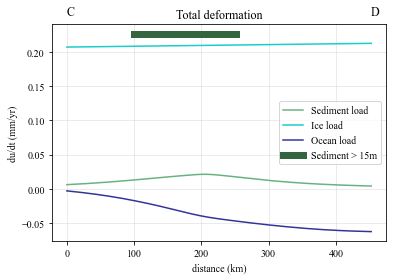

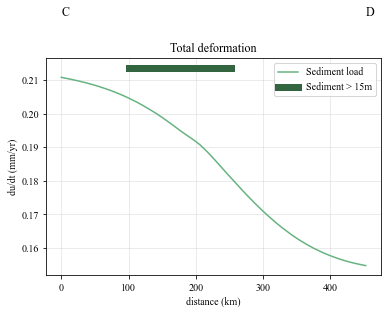

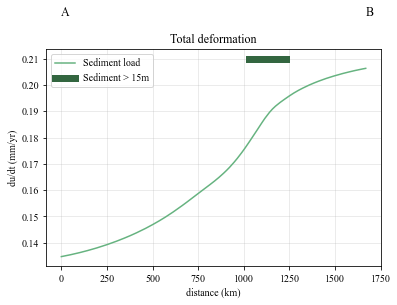

In [41]:
fig_tot_t_1,ax_tot_t_1=plt.subplots()
ax_tot_t_1.plot(L_t_1,D_lin_tot_G_s_t_1,label='Sediment load',color=sediment_color)
ax_tot_t_1.plot(L_t_1,D_lin_tot_G_i_t_1,label='Ice load',color=ice_color)
ax_tot_t_1.plot(L_t_1,D_lin_tot_G_o_t_1,label='Ocean load',color=ocean_color)
ax_tot_t_1.plot(L_t_1,sed_lin_v_t_1+max(ax_tot_t_1.get_ylim()),linewidth=7,color=sediment_color_dark,label='Sediment > '+ str(sediment_v_ceil) +'m')
plt.grid(alpha=0.3)
plt.title('Total deformation')
plt.xlabel('distance (km)')
plt.ylabel('du/dt (mm/yr)')
ax_tot_t_1.legend()
l=ax_tot_t_1.get_yticks()
step=(l[-1]-l[0])/(len(l)-1)/4
ax_tot_t_1.annotate('A', (0,max(ax_tot_t_1.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
ax_tot_t_1.annotate('B', (L_t_1[-1],max(ax_tot_t_1.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
plt.show()

fig_tot_t_2,ax_tot_t_2=plt.subplots()
ax_tot_t_2.plot(L_t_2,D_lin_tot_G_s_t_2,label='Sediment load',color=sediment_color)
ax_tot_t_2.plot(L_t_2,D_lin_tot_G_i_t_2,label='Ice load',color=ice_color)
ax_tot_t_2.plot(L_t_2,D_lin_tot_G_o_t_2,label='Ocean load',color=ocean_color)
ax_tot_t_2.plot(L_t_2,sed_lin_v_t_2+max(ax_tot_t_2.get_ylim()),linewidth=7,color=sediment_color_dark,label='Sediment > '+ str(sediment_v_ceil) +'m')
plt.grid(alpha=0.3)
plt.title('Total deformation')
plt.xlabel('distance (km)')
plt.ylabel('du/dt (mm/yr)')
ax_tot_t_2.legend()
l=ax_tot_t_2.get_yticks()
step=(l[-1]-l[0])/(len(l)-1)/4
ax_tot_t_2.annotate('C', (0,max(ax_tot_t_2.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
ax_tot_t_2.annotate('D', (L_t_2[-1],max(ax_tot_t_2.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
plt.show()

fig_tot_tot_t_2,ax_tot_tot_t_2=plt.subplots()
ax_tot_tot_t_2.plot(L_t_2,D_lin_tot_G_s_t_2+D_lin_tot_G_i_t_2+D_lin_tot_G_o_t_2,label='Sediment load',color=sediment_color)
ax_tot_tot_t_2.plot(L_t_2,sed_lin_v_t_2+max(ax_tot_tot_t_2.get_ylim()),linewidth=7,color=sediment_color_dark,label='Sediment > '+ str(sediment_v_ceil) +'m')
plt.grid(alpha=0.3)
plt.title('Total deformation')
plt.xlabel('distance (km)')
plt.ylabel('du/dt (mm/yr)')
ax_tot_tot_t_2.legend()
l=ax_tot_t_2.get_yticks()
step=(l[-1]-l[0])/(len(l)-1)/4
ax_tot_tot_t_2.annotate('C', (0,max(ax_tot_tot_t_2.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
ax_tot_tot_t_2.annotate('D', (L_t_2[-1],max(ax_tot_tot_t_2.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
plt.show()

fig_tot_tot_t_1,ax_tot_tot_t_1=plt.subplots()
ax_tot_tot_t_1.plot(L_t_1,D_lin_tot_G_s_t_1+D_lin_tot_G_i_t_1+D_lin_tot_G_o_t_1,label='Sediment load',color=sediment_color)
ax_tot_tot_t_1.plot(L_t_1,sed_lin_v_t_1+max(ax_tot_tot_t_1.get_ylim()),linewidth=7,color=sediment_color_dark,label='Sediment > '+ str(sediment_v_ceil) +'m')
plt.grid(alpha=0.3)
plt.title('Total deformation')
plt.xlabel('distance (km)')
plt.ylabel('du/dt (mm/yr)')
ax_tot_tot_t_1.legend()
l=ax_tot_t_1.get_yticks()
step=(l[-1]-l[0])/(len(l)-1)/4
ax_tot_tot_t_1.annotate('A', (0,max(ax_tot_tot_t_1.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
ax_tot_tot_t_1.annotate('B', (L_t_1[-1],max(ax_tot_tot_t_1.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
plt.show()

In [85]:
fig_tot_t_1.savefig(way+'T1_tot_0.5_G.svg',format='svg')
fig_tot_t_2.savefig(way+'T2_tot_0.5_G.svg',format='svg')

## Comparison with earth deformation

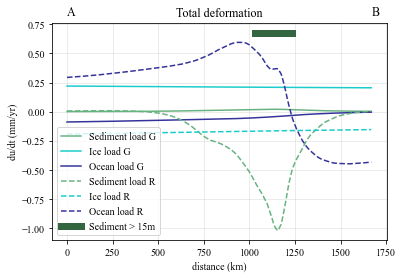

In [26]:
fig_tot_tot_t_1_G,ax_tot_t_1=plt.subplots()
ax_tot_t_1.plot(L_t_1,D_lin_tot_G_s_t_1,label='Sediment load G',color=sediment_color)
ax_tot_t_1.plot(L_t_1,D_lin_tot_G_i_t_1,label='Ice load G',color=ice_color)
ax_tot_t_1.plot(L_t_1,D_lin_tot_G_o_t_1,label='Ocean load G',color=ocean_color)
ax_tot_t_1.plot(L_t_1,D_lin_e_s_t_1+D_lin_v_s_t_1,label='Sediment load R',color=sediment_color,linestyle='--')
ax_tot_t_1.plot(L_t_1,D_lin_e_i_t_1+D_lin_v_i_t_1,label='Ice load R',color=ice_color,linestyle='--')
ax_tot_t_1.plot(L_t_1,D_lin_e_o_t_1+D_lin_v_o_t_1,label='Ocean load R',color=ocean_color,linestyle='--')
ax_tot_t_1.plot(L_t_1,sed_lin_v_t_1+max(ax_tot_t_1.get_ylim()),linewidth=7,color=sediment_color_dark,label='Sediment > '+ str(sediment_v_ceil) +'m')
plt.grid(alpha=0.3)
plt.title('Total deformation')
plt.xlabel('distance (km)')
plt.ylabel('du/dt (mm/yr)')
ax_tot_t_1.legend()
l=ax_tot_t_1.get_yticks()
step=(l[-1]-l[0])/(len(l)-1)/4
ax_tot_t_1.annotate('A', (0,max(ax_tot_t_1.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
ax_tot_t_1.annotate('B', (L_t_1[-1],max(ax_tot_t_1.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
plt.show()

In [88]:
fig_tot_tot_t_1_G.savefig(way+'T1_tot_tot_0.5_G.svg',format='svg')

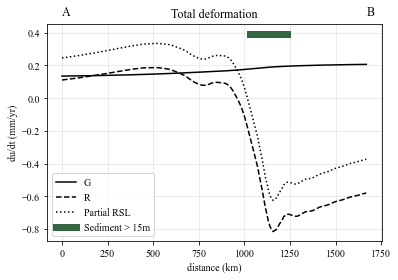

In [27]:
fig_tot_tot_tot_t_1,ax_tot_t_1=plt.subplots()
ax_tot_t_1.plot(L_t_1,D_lin_tot_G_s_t_1+D_lin_tot_G_o_t_1+D_lin_tot_G_i_t_1,label='G',color='k')
ax_tot_t_1.plot(L_t_1,D_lin_e_s_t_1+D_lin_v_s_t_1+D_lin_e_o_t_1+D_lin_v_o_t_1+D_lin_e_i_t_1+D_lin_v_i_t_1,label='R',color='k',linestyle='--')
ax_tot_t_1.plot(L_t_1,D_lin_tot_G_s_t_1+D_lin_tot_G_o_t_1+D_lin_tot_G_i_t_1+D_lin_e_s_t_1+D_lin_v_s_t_1+D_lin_e_o_t_1+D_lin_v_o_t_1+D_lin_e_i_t_1+D_lin_v_i_t_1,label='Partial RSL',color='k',linestyle='dotted')
ax_tot_t_1.plot(L_t_1,sed_lin_v_t_1+max(ax_tot_t_1.get_ylim()),linewidth=7,color=sediment_color_dark,label='Sediment > '+ str(sediment_v_ceil) +'m')
plt.grid(alpha=0.3)
plt.title('Total deformation')
plt.xlabel('distance (km)')
plt.ylabel('du/dt (mm/yr)')
ax_tot_t_1.legend()
l=ax_tot_t_1.get_yticks()
step=(l[-1]-l[0])/(len(l)-1)/4
ax_tot_t_1.annotate('A', (0,max(ax_tot_t_1.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
ax_tot_t_1.annotate('B', (L_t_1[-1],max(ax_tot_t_1.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
plt.show()

In [92]:
fig_tot_tot_tot_t_1.savefig(way+'T1_tot_tot_tot_0.5_G.svg',format='svg')

# Relative Sea level plot

## RSL at point

In [61]:
from spharm import sphericalobject
RSL_pt1=np.zeros((model.time_step_number,))
RSL_pt2=np.zeros((model.time_step_number,))
for t_it in range (model.time_step_number-1):
    RSL_at=sphericalobject(model.delSL[t_it,:]-model.delSL[-1,:],'coeff').coefftogrd_hd(model)
    RSL_pt1[t_it]=RSL_at[i_lat_pt_1,i_lon_pt_1]
    RSL_pt2[t_it]=RSL_at[i_lat_pt_2,i_lon_pt_2]

In [62]:
zoom=[0,8,-3,0.2]

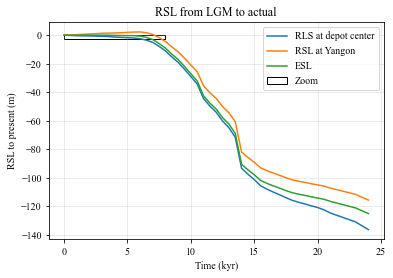

In [63]:
fig_RSL_time,ax_RSL_time=plt.subplots()
ax_RSL_time.plot(model.time_step[2:],RSL_pt1[1:],label='RLS at depot center')
ax_RSL_time.plot(model.time_step[2:],RSL_pt2[1:],label='RSL at Yangon')
ax_RSL_time.plot(model.time_step[2:],ESL[1:],label='ESL')
rect=patches.Rectangle((zoom[0],zoom[2]), zoom[1]-zoom[0],zoom[3]-zoom[2], linewidth=1,edgecolor='k', facecolor='None',label='Zoom',figure=fig_RSL_time)
ax_RSL_time.add_patch(rect)
plt.title('RSL from LGM to actual')
plt.xlabel('Time (kyr)')
plt.ylabel('RSL to present (m)')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

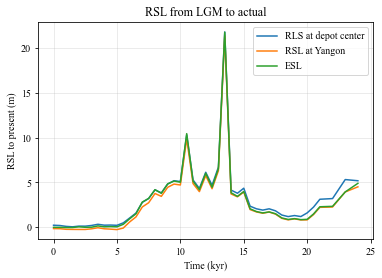

In [85]:
fig_RSL_time,ax_RSL_time=plt.subplots()
ax_RSL_time.plot(model.time_step[2:],(RSL_pt1-np.concatenate((np.zeros((1,)),RSL_pt1[:-1])))[1:],label='RLS at depot center')
ax_RSL_time.plot(model.time_step[2:],(RSL_pt2-np.concatenate((np.zeros((1,)),RSL_pt2[:-1])))[1:],label='RSL at Yangon')
ax_RSL_time.plot(model.time_step[2:],(ESL-np.concatenate((np.zeros((1,)),ESL[:-1])))[1:],label='ESL')
plt.title('RSL from LGM to actual')
plt.xlabel('Time (kyr)')
plt.ylabel('RSL to present (m)')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

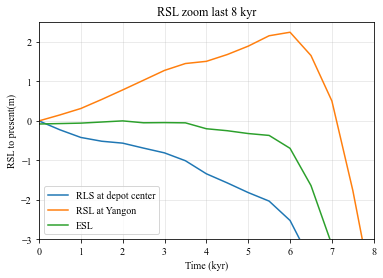

In [86]:
fig_RSL_time_zoom,ax_RSL_time_zoom=plt.subplots()
ax_RSL_time_zoom.plot(model.time_step[1:],RSL_pt1,label='RLS at depot center')
ax_RSL_time_zoom.plot(model.time_step[1:],RSL_pt2,label='RSL at Yangon')
ax_RSL_time_zoom.plot(model.time_step[1:],ESL,label='ESL')
plt.grid(alpha=0.3)
plt.axis([0,8,-3,2.5])
plt.title('RSL zoom last 8 kyr')
plt.xlabel('Time (kyr)')
plt.ylabel('RSL to present(m)')
plt.legend()
plt.show()

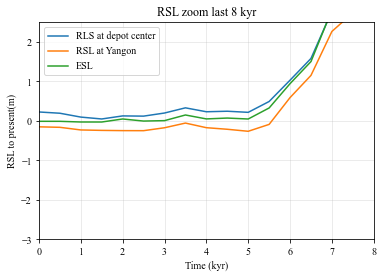

In [73]:
fig_RSL_time_zoom,ax_RSL_time_zoom=plt.subplots()
ax_RSL_time_zoom.plot(model.time_step[1:],RSL_pt1-np.concatenate((np.zeros((1,)),RSL_pt1[:-1])),label='RLS at depot center')
ax_RSL_time_zoom.plot(model.time_step[1:],RSL_pt2-np.concatenate((np.zeros((1,)),RSL_pt2[:-1])),label='RSL at Yangon')
ax_RSL_time_zoom.plot(model.time_step[1:],ESL-np.concatenate((np.zeros((1,)),ESL[:-1])),label='ESL')
plt.grid(alpha=0.3)
plt.axis([0,8,-3,2.5])
plt.title('RSL zoom last 8 kyr')
plt.xlabel('Time (kyr)')
plt.ylabel('RSL to present(m)')
plt.legend()
plt.show()

In [31]:
fig_RSL_time.savefig(way+'time_RSL.svg',format='svg')
fig_RSL_time_zoom.savefig(way+'time_RSL_zoom.svg',format='svg')

## RSL map

(90.0, 100.0, 12.0, 20.0)

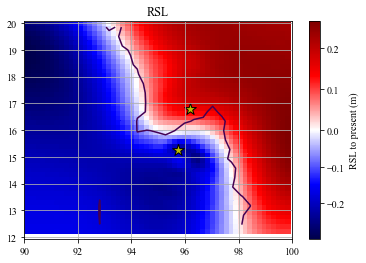

In [60]:
ax_RSL,D_RSL_totale,D_RSL_local,fig_RSL=model.plot_map(model.delSL-model.delSL[-1,:],1,lat=lat_map,lon=lon_map,title='RSL',colorbar_title='RSL to present (m)')
ax_RSL.scatter(lon_pt_1,lat_pt_1-90,s=150,marker='*',color='y',edgecolor='k',label='Observation point')
ax_RSL.scatter(lon_pt_2,lat_pt_2-90,s=150,marker='*',color='y',edgecolor='k')
plt.axis([lon_map[0],lon_map[1],lat_map[0],lat_map[1]])

In [2]:
fig_RSL.savefig(way+'map_RSL.svg',format='svg')

NameError: name 'fig_RSL' is not defined

In [90]:
print((RSL_pt1-np.concatenate((np.zeros((1,)),RSL_pt1[:-1])))[-1]/500*1000,(RSL_pt2-np.concatenate((np.zeros((1,)),RSL_pt2[:-1])))[-1]/500*1000)

0.45058917243582475 -0.30061064902001533


In [50]:
from spharm import sphericalobject
Sed_participation=(model.delG_v_s+model.delG_e_s-(model.delR_v_s+model.delR_e_s))*2
Ocean_participation=(model.delG_v_o+model.delG_e_o-(model.delR_v_o+model.delR_e_o))*2
Ice_participation=(model.delG_v_i+model.delG_e_i-(model.delR_v_i+model.delR_e_i))*2

Sed_participation_grd=sphericalobject(Sed_participation[time_ind,:]-Sed_participation[time_ind-1,:],"coeff").coefftogrd_hd(model)
Ocean_participation_grd=sphericalobject(Ocean_participation[time_ind,:]-Ocean_participation[time_ind-1,:],"coeff").coefftogrd_hd(model)
Ice_participation_grd=sphericalobject(Ice_participation[time_ind,:]-Ice_participation[time_ind-1,:],"coeff").coefftogrd_hd(model)
total_SL=sphericalobject(-(model.delSL[-2,:]-model.delSL[-1,:])*2,"coeff").coefftogrd_hd(model)

Sed_p_participation_grd=np.abs(Sed_participation_grd/total_SL)
Ocean_p_participation_grd=np.abs(Ocean_participation_grd/total_SL)
Ice_p_participation_grd=np.abs(Ice_participation_grd/total_SL)







C:\Users\ahenry01\AppData\Local\Temp\ipykernel_19704\2104773392.py:15: UserWarning:

The following kwargs were not used by contour: 'color'



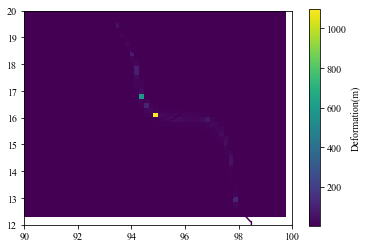

In [56]:

import matplotlib.pyplot as plt

lat_map_min=np.absolute(model.grid.lats-lat_map[0]).argmin()
lat_map_max=np.absolute(model.grid.lats-lat_map[1]).argmin()
if lat_map_min>lat_map_max :
    temps=lat_map_max
    lat_map_max=lat_map_min
    lat_map_min=temps
lon_map_min=np.absolute(model.grid.elons-lon_map[0]).argmin()
lon_map_max=np.absolute(model.grid.elons-lon_map[1]).argmin()
lat_map_min,lat_map_max,lon_map_min,lon_map_max=lat_map_min*2,lat_map_max*2,lon_map_min*2,lon_map_max*2

fig,ax=plt.subplots()
sp=plt.pcolor(model.elons_res[lon_map_min:lon_map_max],model.lats_res[lat_map_min:lat_map_max],np.abs(Sed_participation_grd/total_SL)[lat_map_min:lat_map_max,lon_map_min:lon_map_max])
ax.contour(model.grid.elons,model.grid.lats,model.topo.topo_pres,[0],color='k')
plt.colorbar(sp,label='Deformation(m)')
ax.set_aspect('equal',adjustable='box')
ax.axis([lon_map[0],lon_map[1],lat_map[0],lat_map[1]])
plt.show()

# Decomposed subsidence

In [2]:
import numpy as np
subsidence=np.zeros((model.time_step,model.time_step)+model.delR_v_i.shape)

NameError: name 'model' is not defined